
# Background and Context

    AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

    A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

    You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective

    To predict whether a liability customer will buy a personal loan or not.
    Which variables are most significant.
    Which segment of customers should be targeted more.

# Data Dictionary

    * ID: Customer ID
    * Age: Customer’s age in completed years
    * Experience: #years of professional experience
    * Income: Annual income of the customer (in thousand dollars)
    * ZIP Code: Home Address ZIP code.
    * Family: the Family size of the customer
    * CCAvg: Average spending on credit cards per month (in thousand dollars)
    * Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
    * Mortgage: Value of house mortgage if any. (in thousand dollars)
    * Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
    * Securities_Account: Does the customer have securities account with the bank?
    * CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
    * Online: Do customers use internet banking facilities?
    * CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### I'll using various method and code snippet used in case study and video lectures for this project work

### Import necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# adds a nice background to the graphs
sns.set(color_codes=True) 
# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
sns.set_palette("pastel") # Set the palette to the "pastel"

# Library to split data
from sklearn.model_selection import train_test_split

# To build logistic regression model
from sklearn.linear_model import LogisticRegression
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
 
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
 
%matplotlib inline


### Read the dataset from Loan file 

In [2]:
loanData  = pd.read_csv("Loan_Modelling.csv")

In [3]:
# copy dataframe object into new object to avoid situatuont o accidently updating the original file
loan = loanData.copy()

### Inspect first and last 5 rows of the dataset.

In [4]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [5]:
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


### Inspect the shape of the dataset.

In [6]:
loan.shape

(5000, 14)

* Loan data frame has 5000 rows and 14 columns

### Checking for Null and Duplicate values

In [7]:
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* there is no column with value null

In [8]:
loan[loan.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There is no column with duplicate value

### Inspect property of the columns

In [9]:
loan.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* ID column is to maintain the sequence of rows. which will be dropped later 
* CCAvg is of datatype float64
* All remaining columns are of data type int64
* These columns will be required to be converted to category type - Family, Education
* These column will be converted to type boolean Personal_loan,Securities_Account, CD_Account, Online, CreditCard

In [10]:
# Dropping ID column
loan.drop(["ID"], axis = 1, inplace=True)

In [11]:
# Converting Family and Education column to type category
loan['Family'] =  loan['Family'].astype('category')
loan['Education'] = loan['Education'].astype('category')

In [12]:
# Converting Personal_Loan,Securities_Account, CD_Account, Online and CreditCard to data type boolean
loan['Personal_Loan'] =  loan['Personal_Loan'].astype('bool')
loan['Securities_Account'] = loan['Securities_Account'].astype('bool')
loan['CD_Account'] = loan['CD_Account'].astype('bool')
loan['Online'] =  loan['Online'].astype('bool')
loan['CreditCard'] = loan['CreditCard'].astype('bool')

### Inspect the summary of dataset

In [13]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIPCode,5000.00,93169.26,1759.46,90005.00,91911.00,93437.00,94608.00,96651.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00


* Age has 50% percentile very close to mean and it lies between Min and Max value 
* Experience has 50% percentile close to mean but min value is -3 which is invalid value. We'll inspect similar values.
* Income rightly skewed, differnce between main and max value is large
* Zipcode is left skewed. It can be dropped , it might not be affecting decison making for customer. it can be dropped later after analysis.
* CCAvg is left skewed, with min value of 0. That is some customers are not using credit card.
* Mortgage left skewed  with more than 50%  people are not on mortgage 

In [14]:
loan.describe(include=['category','bool']).T

,count,unique,top,freq
Family,5000,4,1,1472
Education,5000,3,1,2096
Personal_Loan,5000,2,False,4520
Securities_Account,5000,2,False,4478
CD_Account,5000,2,False,4698
Online,5000,2,True,2984
CreditCard,5000,2,False,3530


### Get the value counts for all columns 

In [15]:
display_rec_limit = 5
columns = ['']
for  col in loan.columns:
    record_count =  len(loan[col].value_counts())
    display_records = loan[col].value_counts()[:display_rec_limit]
    print(display_records)
    if(record_count > display_rec_limit):
        print(f'Only displaying {display_rec_limit} of {record_count} values')
    else:
         print(f'Total unique values is {len(display_records)}')
    print("*" * 50, '\n')
 

35    151
43    149
52    145
58    143
54    143
Name: Age, dtype: int64
Only displaying 5 of 45 values
************************************************** 

32    154
20    148
9     147
5     146
23    144
Name: Experience, dtype: int64
Only displaying 5 of 47 values
************************************************** 

44    85
38    84
81    83
41    82
39    81
Name: Income, dtype: int64
Only displaying 5 of 162 values
************************************************** 

94720    169
94305    127
95616    116
90095     71
93106     57
Name: ZIPCode, dtype: int64
Only displaying 5 of 467 values
************************************************** 

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
Total unique values is 4
************************************************** 

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
0.10    183
0.40    179
1.50    178
0.70    169
0.50    163
1.70    158
1.80    152
1.40    136
2.20    130
1.30    128
0.60    118
2.80 

* On inspection records for all columns looks good but for experience column only, it can't be less than 0, 
we'll find out any experience less than 0 and try imputing it with valid value if possible.

In [16]:
invalid_Exp = loan[loan.Experience < 0]
invalid_Exp

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,False,False,False,False,True
226,24,-1,39,94085,2,1.70,2,0,False,False,False,False,False
315,24,-2,51,90630,3,0.30,3,0,False,False,False,True,False
451,28,-2,48,94132,2,1.75,3,89,False,False,False,True,False
524,24,-1,75,93014,4,0.20,1,0,False,False,False,True,False
536,25,-1,43,92173,3,2.40,2,176,False,False,False,True,False
540,25,-1,109,94010,4,2.30,3,314,False,False,False,True,False
576,25,-1,48,92870,3,0.30,3,0,False,False,False,False,True
583,24,-1,38,95045,2,1.70,2,0,False,False,False,True,False
597,24,-2,125,92835,2,7.20,1,0,False,True,False,False,True


In [17]:
invalid_Exp.shape

(52, 13)

* Most of invalid experience records are for age group of 20's, remaining feature of the rows  doesn't 
show any discrepancy.
* For Experience feature , income , family, Education , CCAVG etc values looks relevent. We'll either impute it by mean or assuminy its data entry mistake.
* Assuming its data entry mistake because mean can affect the modal result. I'll replace negative value with
  absolute value
* We safely drop ZIPcode feature, because these feature doesn't contribute in decision making for customer to take personal loan. 

In [18]:
loan.Experience.apply(lambda x: abs(x))

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [19]:
loan.drop(['ZIPCode'], inplace=True, axis=1)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   bool    
 8   Securities_Account  5000 non-null   bool    
 9   CD_Account          5000 non-null   bool    
 10  Online              5000 non-null   bool    
 11  CreditCard          5000 non-null   bool    
dtypes: bool(5), category(2), float64(1), int64(4)
memory usage: 229.9 KB


## Data Visualization
### Univariate Analysis

using same (histogram_boxplot) method which we used in case study for linear regression

In [20]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# This function will craete a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Age

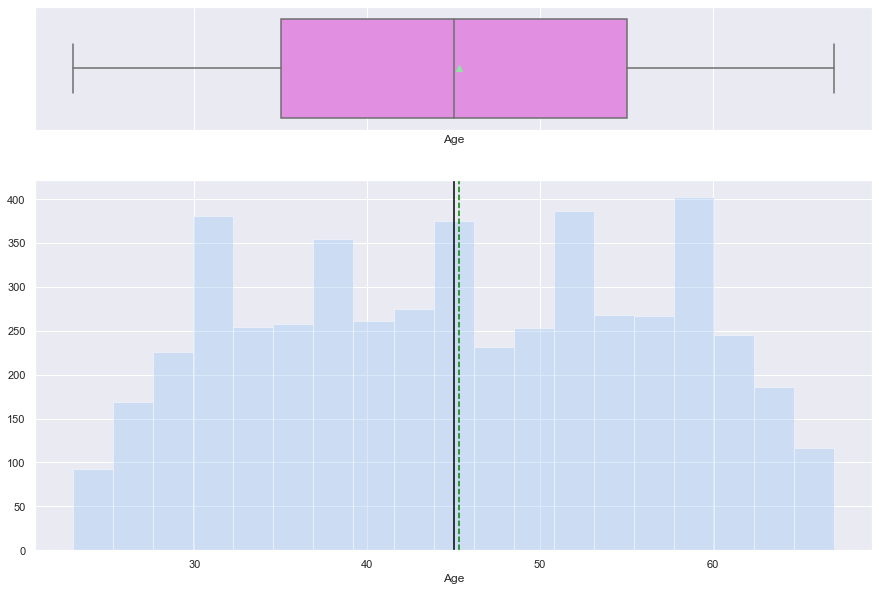

In [21]:
histogram_boxplot(loan["Age"])

* There is no outlier in this feature
* Mean and Median is very close to 45 years. 
* From Histogram data seems to be almost identical on left and right side of mean. we can assume age is normally 
  distributed in this case

In [22]:
### Observations on Income

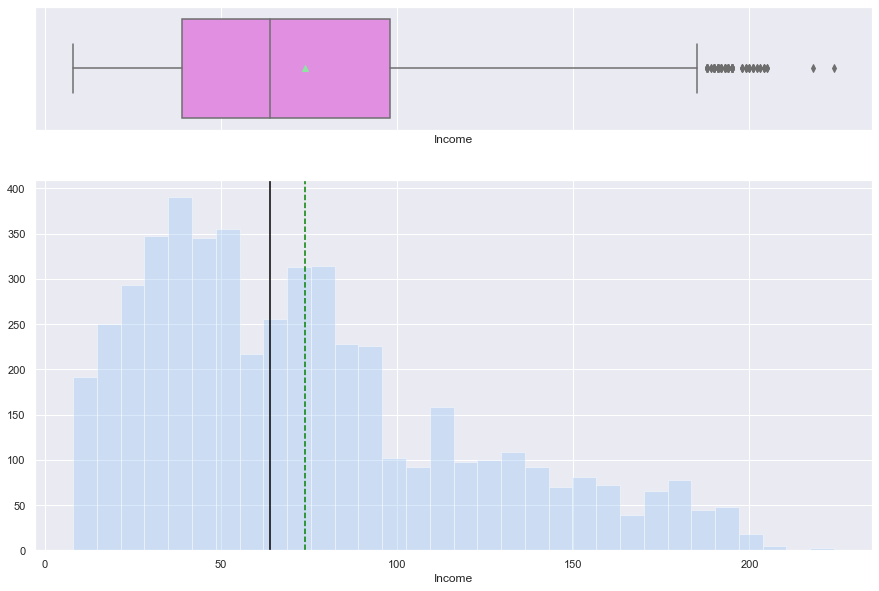

In [23]:
histogram_boxplot(loan["Income"])

* There are outliers in income groups
* Income is slightly right skewed
* Number of people with income less than 64k is more than right side of Mean. This information can be useful to approach customer for personal loan.

In [24]:
### Observations on CCAvg

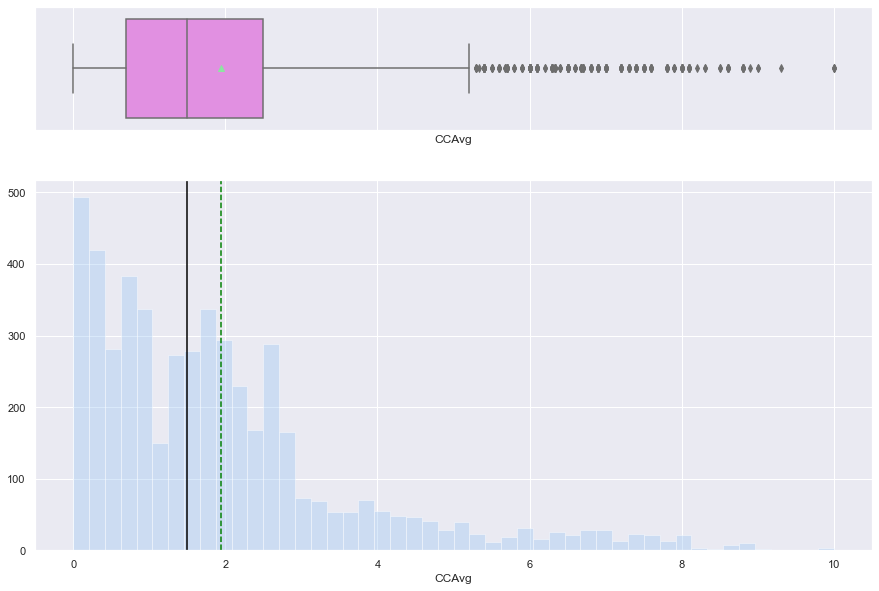

In [25]:
histogram_boxplot(loan["CCAvg"])

* Some of the variable in the features are outliers
* CCAVG is right skewed and close to 1.9k
* There are set of customers who is big spender. They can be approached for Personal loan.

### Observations on Mortgage

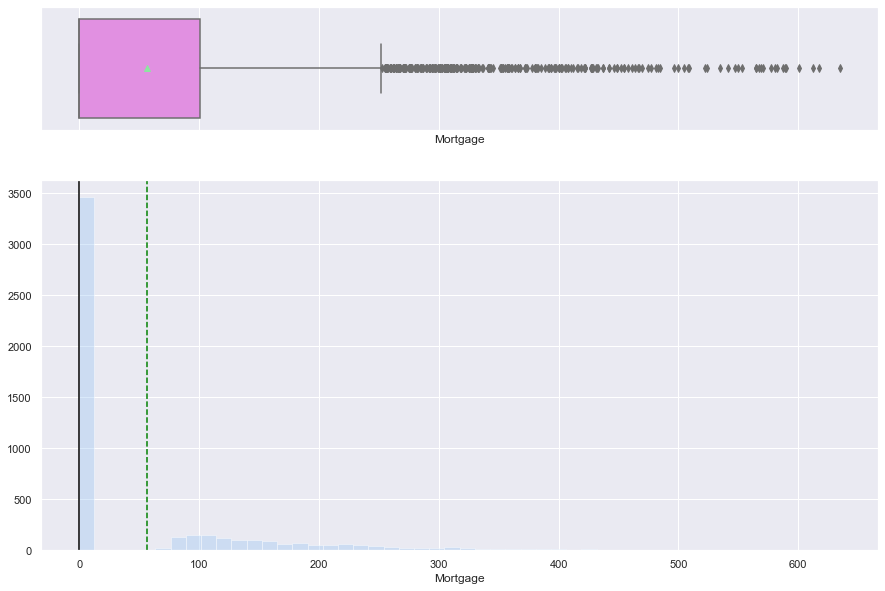

In [26]:
histogram_boxplot(loan["Mortgage"])

* There are too many outliers variable for Mortage feature
* Distribution is right skewed
* There will be opportuity to convert these customers to asset. Many of the Mortgage owner will like to avail 
  Personal loan to meet deadline.

In [27]:
# Using same method which we used in case study for linear regression

# Function to create barplots that indicate percentage for each category.

def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

### Observations on *Family*

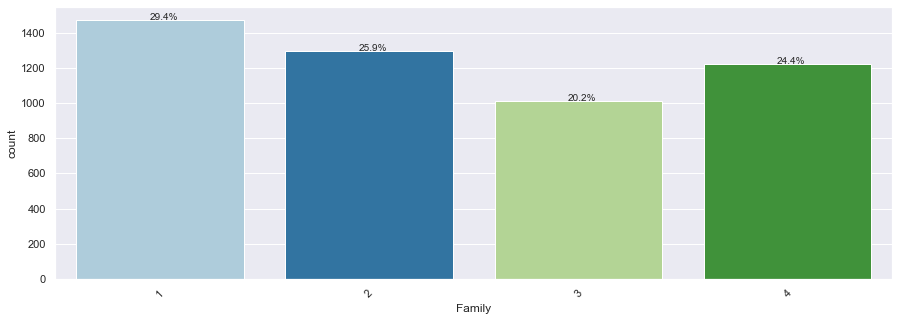

In [28]:
perc_on_bar(loan, 'Family')

* 29.4% people are single person family.
* One person family can be approached with proper plan to convert to asset

### Observations on *Education*

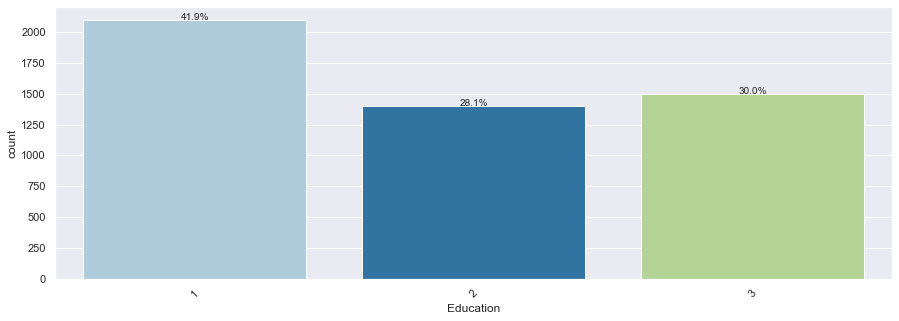

In [29]:
perc_on_bar(loan, 'Education')

* 41.9% has undergrad education qualification

### Observations on *Personal_Loan*

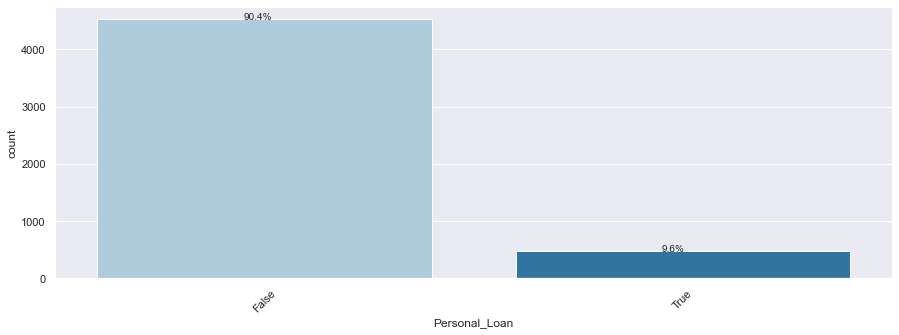

In [30]:
perc_on_bar(loan, 'Personal_Loan')

* More than 90% people are not on personal_loan. which is more than 9 times the people who has taken loan.
* These people can be approached with right plan to convert them into asset

### Observations on *Securities_Account*

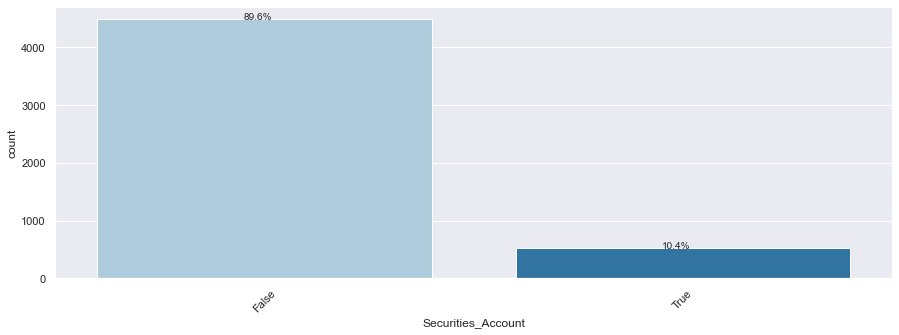

In [31]:
perc_on_bar(loan, 'Securities_Account')

* Alsmost 90% customers don't have securities account with bank . which is again 9 times as of 
customers who have securities account.
* People with securities account sometimes like to trade when they see potential in market like to avail loan to 
  grab the market opportunity. Therefore , they are right candidate to convert to asset.

### Observations on *CD_Account*

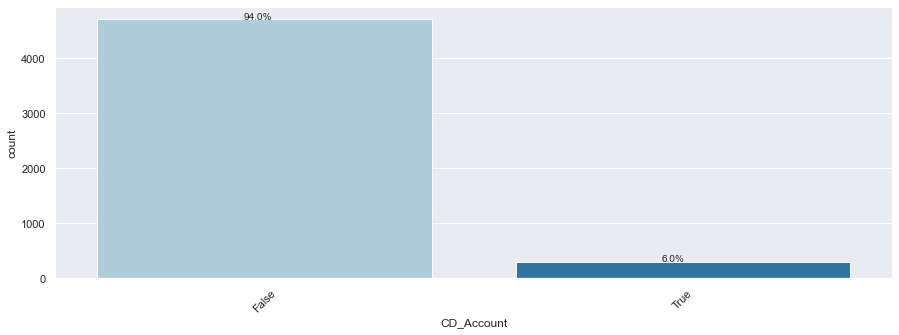

In [32]:
perc_on_bar(loan, 'CD_Account')

* People with no CD account with bank is more than 15 times.
* These customers can be approached to open CD accoutn and in return they can get discounted rate of Personal loan 
  without breaking the locking term of CD account.

### Observations on *Online*

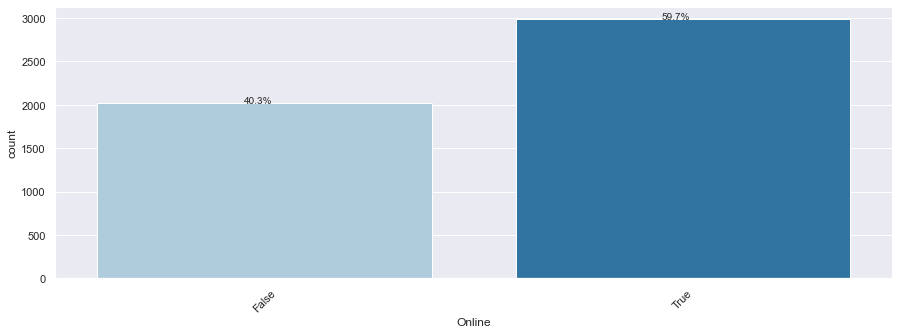

In [33]:
perc_on_bar(loan, 'Online')

* Majority of customers are online users
* We can bring left out customers to online 
* Make loan approval process online friendly by removing some of the not needed steps.

### Observations on *CreditCard*

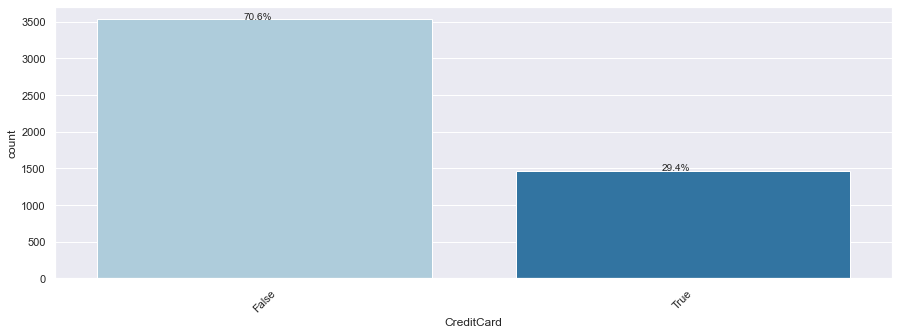

In [34]:
perc_on_bar(loan, 'CreditCard')

* There are 70% customers who are not credit card users
* There is good potential for credit card card market and from which some of the customers can be converted to 
  asset. when they'll like to pay their credit card bills.

## Bivariate Analysis
### Coorelation analysis

In [35]:
loanCorr = loan.corr()
loanCorr

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.00,0.99,-0.06,-0.05,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,0.99,1.00,-0.05,-0.05,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.06,-0.05,1.00,0.65,0.21,0.50,-0.00,0.17,0.01,-0.00
CCAvg,-0.05,-0.05,0.65,1.00,0.11,0.37,0.02,0.14,-0.00,-0.01
Mortgage,-0.01,-0.01,0.21,0.11,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal_Loan,-0.01,-0.01,0.50,0.37,0.14,1.00,0.02,0.32,0.01,0.00
Securities_Account,-0.00,-0.00,-0.00,0.02,-0.01,0.02,1.00,0.32,0.01,-0.02
CD_Account,0.01,0.01,0.17,0.14,0.09,0.32,0.32,1.00,0.18,0.28
Online,0.01,0.01,0.01,-0.00,-0.01,0.01,0.01,0.18,1.00,0.00
CreditCard,0.01,0.01,-0.00,-0.01,-0.01,0.00,-0.02,0.28,0.00,1.00


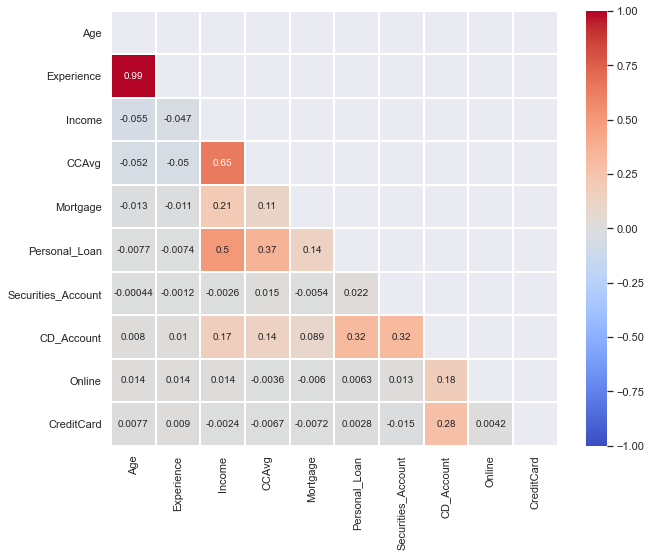

In [36]:
# Below steps  and configuration will create heat map for lower diagonal half only , as we know lower and 
# upper half half contains same value but with differnt order of axis.
def gen_heatmap(corrDF):
    cgf_mask = np.zeros_like(corrDF, dtype=np.bool)
    cgf_mask[np.triu_indices_from(cgf_mask)] = True
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corrDF,  annot=True, mask=cgf_mask, cmap= "coolwarm", vmax=1, vmin=-1, center=-0, 
                     linewidths=1, cbar_kws={"shrink": 1});
    
gen_heatmap(loanCorr)

* There is strong coorelation(0.99) between Experience and Age. Therefore, We can drop one of this feature because thery represet each other.
* There is strong coorelation(0.65) between CCAvg and Income.
* There is correlation of 0.5 between Personal_Loan and Income.
* There is correlation of 0.37 between Personal_Loan and CCAvg.
* There is correlation of 0.32 between Personal_Loan and CD_Account.
* There is correlation of 0.32 between Securities_Account and CD_Account.
* There is correlation of 0.28 between Credit_Card and CD_Account.
* Remainign features are weekly coorelated with each other.Therfore we can ignore their impact.

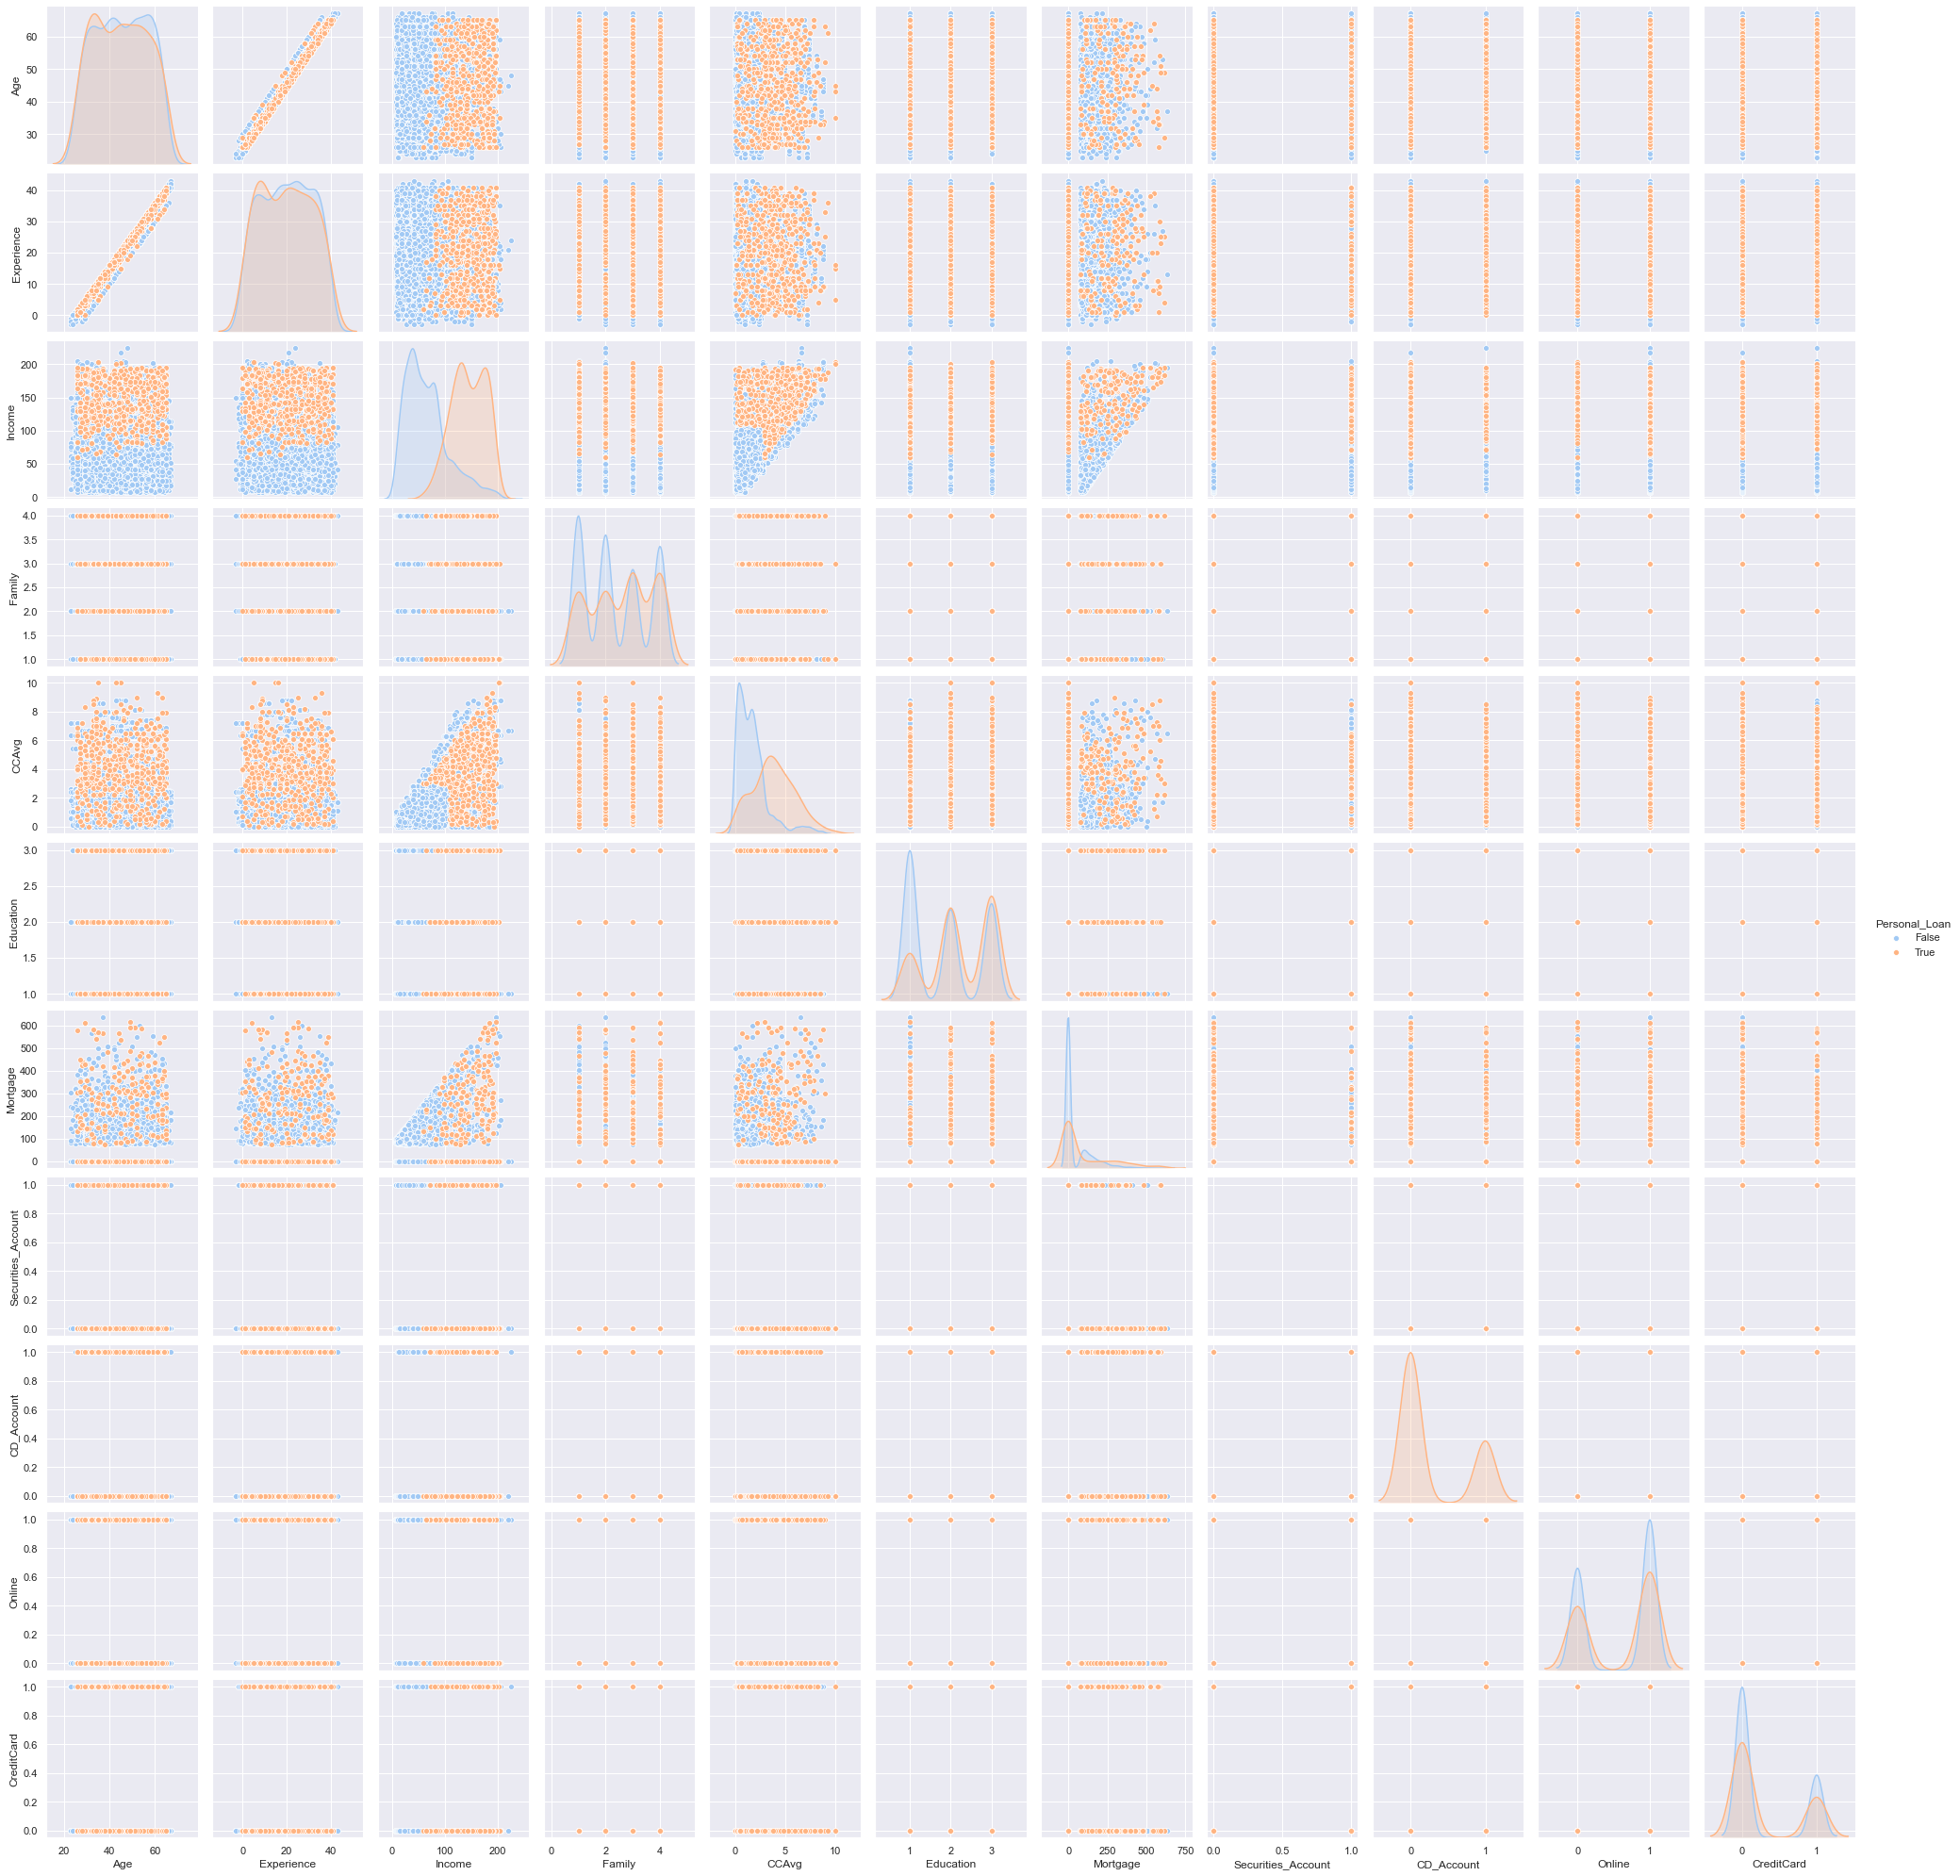

In [37]:
sns.pairplot(data=loan, hue="Personal_Loan")
plt.show()

* We can see varying distributions in variables for revenue, we should investigate it further.
* Categorical and boolean variable doesn'nt explain much of the correalation  
* CCAvg and Mortage is displaying postivide coorelation.
* Age and Experience is showing very strong coorelation

### Check realationship between personnal loan and Age, Income, CCAvg and Mortgage features

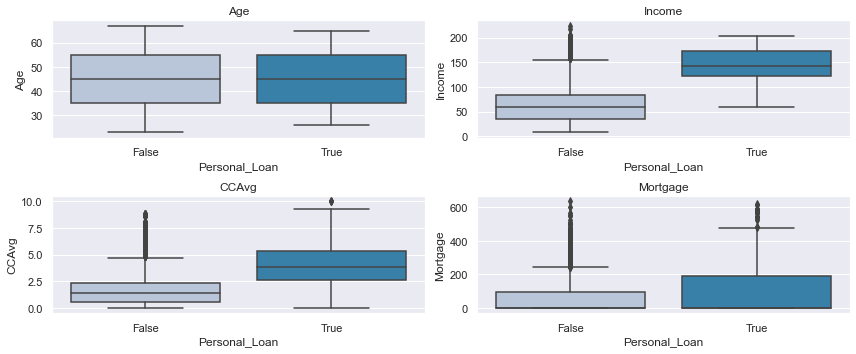

In [38]:
def box_plot_cols(x_target):
    '''
    Box plot for given columns against the target feature provided
    '''
    cols = loan[
    [   "Age",
        "Income", 
        "CCAvg",
        "Mortgage"
    ]
    ].columns.tolist()
    plt.figure(figsize=(12, 7))

    for i, variable in enumerate(cols):
        plt.subplot(3, 2, i + 1)
        sns.boxplot(loan[x_target], loan[variable], palette="PuBu")
        plt.tight_layout()
        plt.title(variable)
    plt.show()

box_plot_cols("Personal_Loan")

* Customers opting for Personal loan are spread acrosll all age group
* Customers with higher income group are also personal loan customer
* Customers with higer CCAvg are asset customers
* Customers with Mortgage also opted for Personal loan.

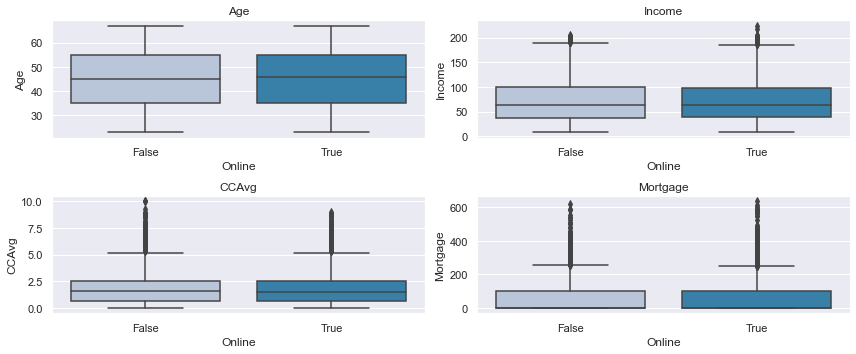

In [39]:
box_plot_cols("Online")

* In all category we can see that there is good many people are not online customers. These are left out or
  difficult to approach groups, in case bank like to target them.
* CCAvg and Mortgage has many outliers and non-online users. They can be targetted for Personal loan.

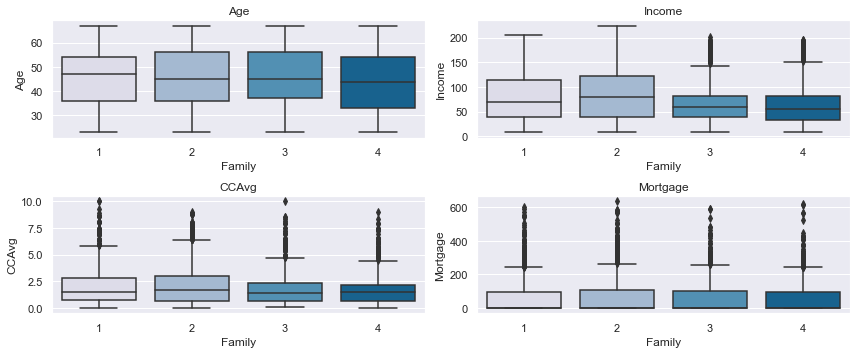

In [40]:
box_plot_cols("Family")

* There is big section of single and 2 member family in higher age group and High income group
* Single and Double head family has also many outliers in CCAvg and Mortgage. That means they have high
  disposable income.

### Let's check the relationship in *Personal_Loan* with some of the categorical columns in our data

In [41]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(y, x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,y,margins=True)
    print(tab1)
    print('-'*110)
    ## visualising the cross tab
    tab = pd.crosstab(x,y,normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Personal_Loan  False  True   All
Family                          
1               1365   107  1472
2               1190   106  1296
3                877   133  1010
4               1088   134  1222
All             4520   480  5000
--------------------------------------------------------------------------------------------------------------


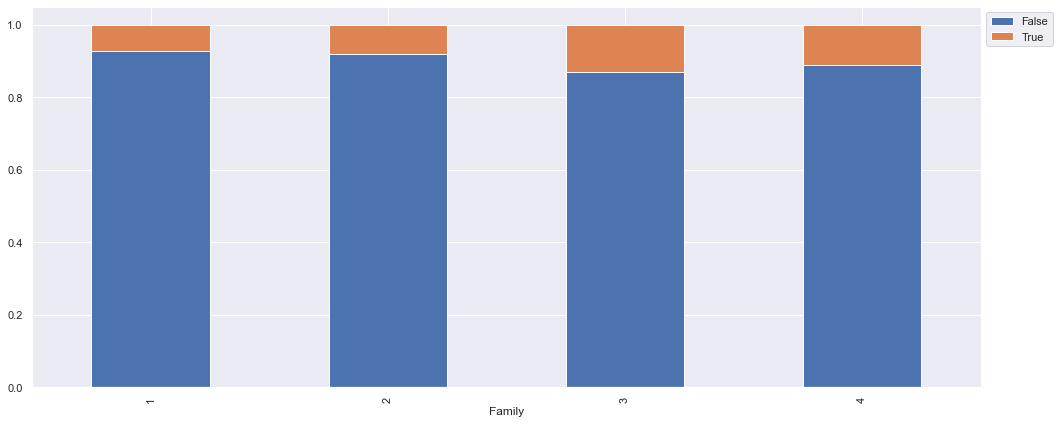

In [42]:
stacked_plot(loan['Personal_Loan'], loan['Family'])

* Family with 3 or more head counts are good category to approach for Personal loan scheme. 

Personal_Loan       False  True   All
Securities_Account                   
False                4058   420  4478
True                  462    60   522
All                  4520   480  5000
--------------------------------------------------------------------------------------------------------------


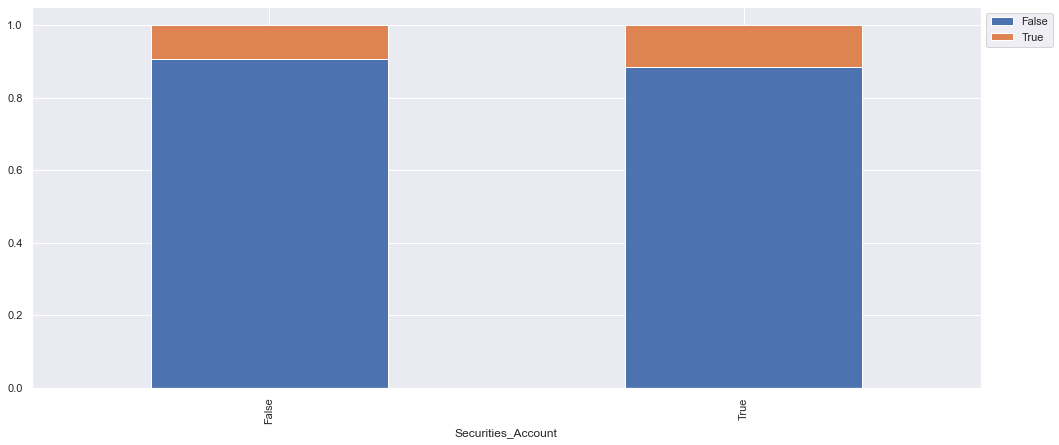

In [43]:
stacked_plot(loan['Personal_Loan'], loan['Securities_Account'])

* Customers who have Security account are opting for Personal loan more than who don't have security account.

Personal_Loan  False  True   All
Education                       
1               2003    93  2096
2               1221   182  1403
3               1296   205  1501
All             4520   480  5000
--------------------------------------------------------------------------------------------------------------


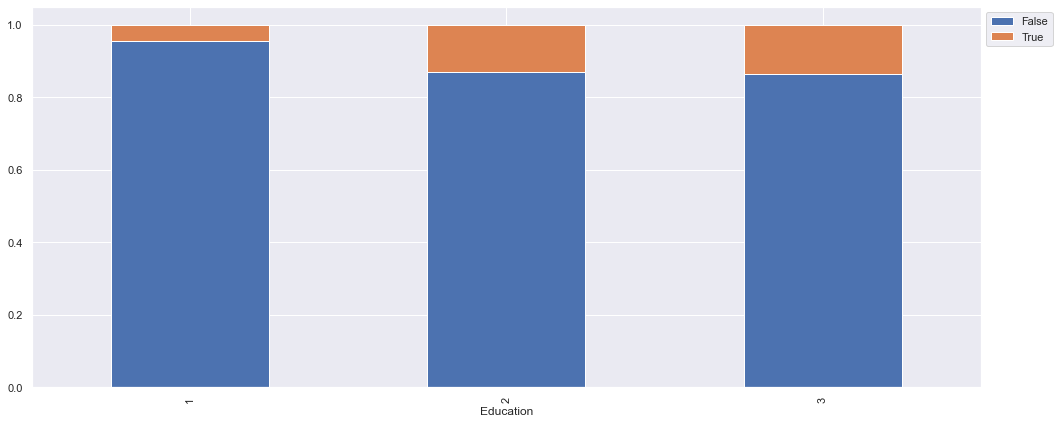

In [44]:
stacked_plot(loan['Personal_Loan'], loan['Education'])

* Customers with higher education with category 2 and 3 are using Personal loan more than Undergrad customers

Personal_Loan  False  True   All
CD_Account                      
False           4358   340  4698
True             162   140   302
All             4520   480  5000
--------------------------------------------------------------------------------------------------------------


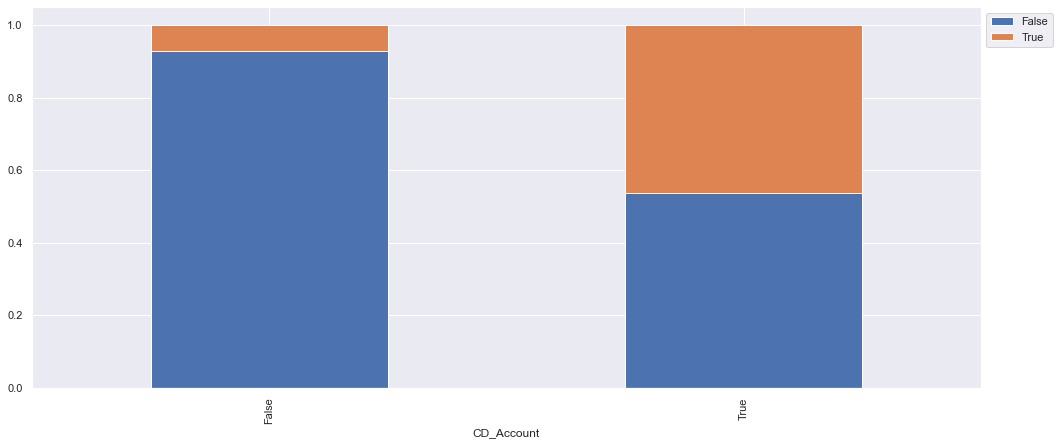

In [45]:
stacked_plot(loan['Personal_Loan'], loan['CD_Account'])

* There is big potential with customers who has CD account with bank. They are availing personal 
loan in large numbers

Personal_Loan  False  True   All
Online                          
False           1827   189  2016
True            2693   291  2984
All             4520   480  5000
--------------------------------------------------------------------------------------------------------------


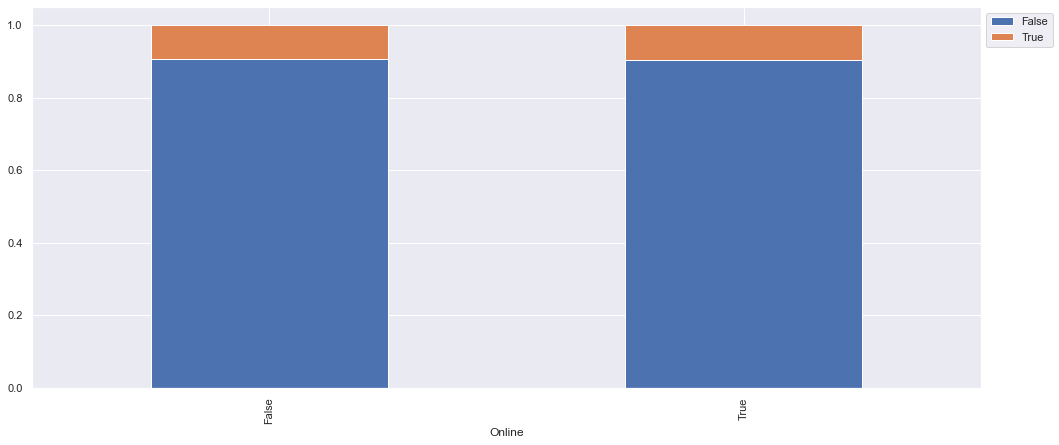

In [46]:
stacked_plot(loan['Personal_Loan'], loan['Online'])

* There is not much difference between online users and non-online users , and their ratio with respect to availing 
Personal loan. Thats means both of these category can targeted for asset conversion equally.

Personal_Loan  False  True   All
CreditCard                      
False           3193   337  3530
True            1327   143  1470
All             4520   480  5000
--------------------------------------------------------------------------------------------------------------


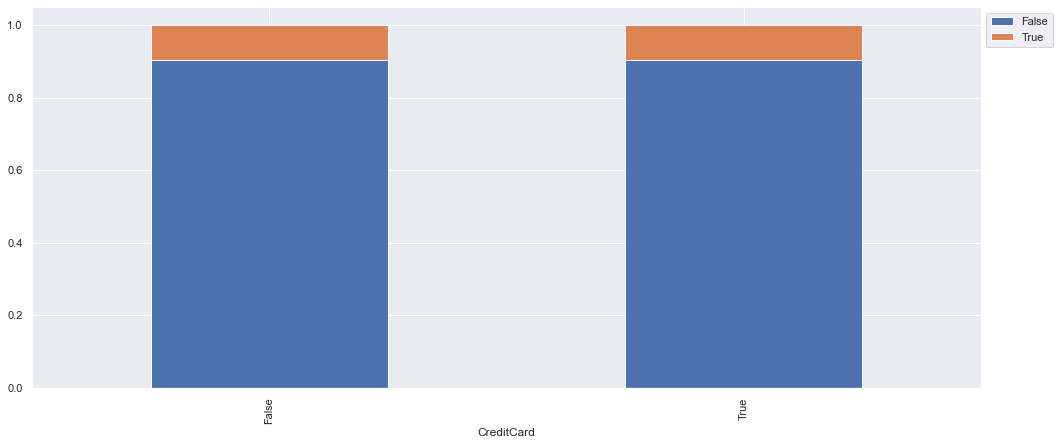

In [47]:
stacked_plot(loan['Personal_Loan'], loan['CreditCard'])

* Ratio of Personal loan opted by customer in both category are almost same.   Thats means both of 
these category can targeted for asset conversion equally.

### Inspect CD Account and Securities Account and its relation to various features. Their pattern can help to analyze converison of liability customers to asset customers

We are studying CD account and security account because  they are liability account and we can target 
them for asset conversion 

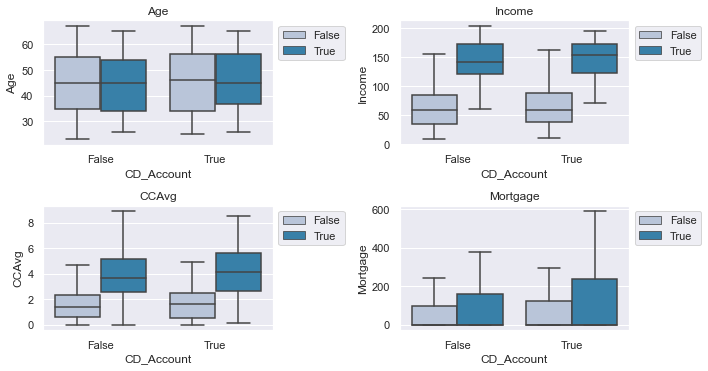

In [48]:
cols = loan[
    [   "Age",
        "Income", 
        "CCAvg",
        "Mortgage"
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(
        loan["CD_Account"],
        loan[variable],
        hue=loan["Personal_Loan"],
        palette="PuBu",
        showfliers=False,
    )  # turning-off outliers
    plt.tight_layout()
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(variable)
plt.show()

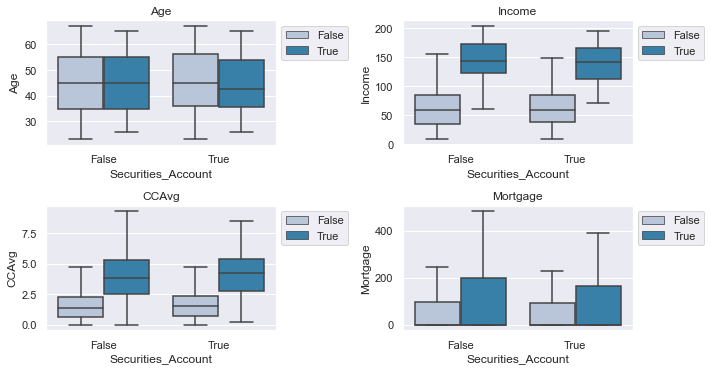

In [49]:
cols = loan[
    [   "Age",
        "Income", 
        "CCAvg",
        "Mortgage"
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(
        loan["Securities_Account"],
        loan[variable],
        hue=loan["Personal_Loan"],
        palette="PuBu",
        showfliers=False,
    )  # turning-off outliers
    plt.tight_layout()
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(variable)
plt.show()

Both the account type are showing exactly same pattern in box plot. Below is the detail
* Irrespective of age people opt for personal loan equally in any account type, so any age group can be targeted
* Higher income group is opting for personal loan more than lower income group
* Customer who has hight average Credit card expense are availing  the personal loan
* Irrespective of Mortgage people opt for personal loan equally in any account type, so any Mortgage group can be targeted

### <a id='link1'>Summary of EDA</a>
**Data Description:**

- There is no duplicate values in the dataset.
- There are no missing values in the data.
- Most of the data-types are either **int64** or **float64**.
- We converted `Family` and `Educaiton` to type category 
- We converted `Personal_Loan`, `Securities_Account`, `CD_Account`, `Online` and `CreditCard` to type boolean

**Data Cleaning:**

* We observed that Experience column has negative values and imputed it with absolute value instead of mean.
  mean value impute might have deviated the model. so assumint it was typing mistake we replaced it with absolute value
* ZIPcode feature is dropped  because it was  not contributing in decision making for customer to take personal loan.

**Observations from EDA:**

* `Family`: Family with 3 or more head counts are good category to approach for Personal loan scheme. 
Securities_Account

* `Securities_Account`: Customers who have Security account are opting for Personal loan more than who don't have security account.

* `Education`: Customers with higher education with category 2 and 3 are using Personal loan more than Undergrad customers

* `CD_Account`: There is big potential with customers who has CD account with bank. They are availing personal 
loan in large numbers

* `Online`: There is not much difference between online users and non-online users , and their ratio with respect to availing 
Personal loan. Thats means both of these category can targeted for asset conversion equally.

* `CreditCard`: Ratio of Personal loan opted by customer in both category are almost same.   Thats means both of 
these category can be targeted for asset conversion equally.

* `CD_Account/Securities_Account vs Age, Income, CCAvg and Mortgage`:
    Both the account type are showing exactly same pattern in box plot. Below is the detail
    * Irrespective of age people opt for personal loan equally in any account type, so any age group can be targeted
    * Higher income group is opting for personal loan more than lower income group
    * Customer who has hight average Credit card expense are availing  the personal loan
    * Irrespective of Mortgage people opt for personal loan equally in any account type, so any Mortgage group can be targeted

* `Online vs Age, Income, CCAvg and Mortgage`:
    * In all category we can see that there is good many people are not online customers. These are left out or
    difficult to approach groups, in case bank like to target them.
    * CCAvg and Mortgage has many outliers and non-online users. They can be targetted for Personal loan.

* `Family vs Age, Income, CCAvg and Mortgage`:
    * There is big section of single and 2 member family in higher age group and High income group
    * Single and Double head family has also many outliers in CCAvg and Mortgage. That means they have high
      disposable income.

**Actions for data pre-processing:**

* We'll inspect the columns "CCAvg", "Mortgage" for skewness and take appropriate actions to keep/drop it.
* There was very strong coorelation(0.99) between Age and experience.Therefore, We'll drop Experience column because either age or experience will represent same data.

### Data Preparation

Inspect the columns "CCAvg", "Mortgage" for skewness and try log transformation to smoothen it.

In [50]:
# creating a copy of the dataframe
logLoan = loan.copy()
log_cols=["CCAvg", "Mortgage"]

# using log transforms on some columns
for col in log_cols:
    logLoan[col + "_log"] = np.log(logLoan[col] + 1)

logLoan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,CCAvg_log,Mortgage_log
0,25,1,49,4,1.60,1,0,False,True,False,False,False,0.96,0.00
1,45,19,34,3,1.50,1,0,False,True,False,False,False,0.92,0.00
2,39,15,11,1,1.00,1,0,False,False,False,False,False,0.69,0.00
3,35,9,100,1,2.70,2,0,False,False,False,False,False,1.31,0.00
4,35,8,45,4,1.00,2,0,False,False,False,False,True,0.69,0.00


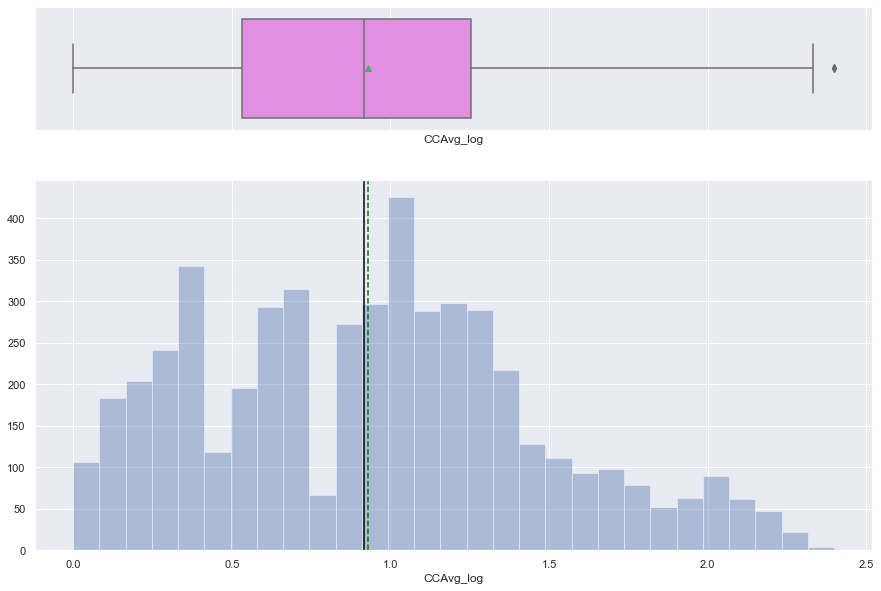

In [51]:
histogram_boxplot(logLoan["CCAvg_log"])

* There is improvement in skewness of CCAvg. So we'll drop CCAvg column from dataFrame.

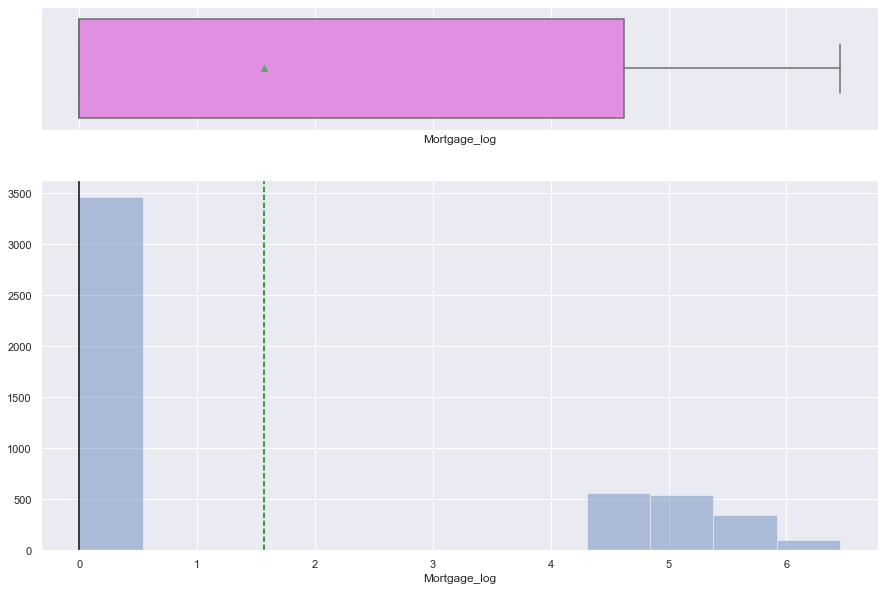

In [52]:
histogram_boxplot(logLoan["Mortgage_log"])

* There is no improvement in skewness of Mortgage. So we'll drop Mortgage_log column from dataFrame.

In [53]:
# Dropping CCAvg and Mortgage_log from Dataframe.
# Dropping Experience as well , because its very strongly related to Age
logLoan.drop(["Experience","CCAvg","Mortgage_log" ], axis=1, inplace=True)

In [54]:
# Creating dummy variables from all categorical features
dummy_logLoan = pd.get_dummies(logLoan,
              columns=[
                "Family",
                "Education", 
                "Securities_Account",
                "CD_Account",
                "Online",
                "CreditCard"  
              ],  
              drop_first=True)
dummy_logLoan.head()

,Age,Income,Mortgage,Personal_Loan,CCAvg_log,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_True,CD_Account_True,Online_True,CreditCard_True
0,25,49,0,False,0.96,0,0,1,0,0,1,0,0,0
1,45,34,0,False,0.92,0,1,0,0,0,1,0,0,0
2,39,11,0,False,0.69,0,0,0,0,0,0,0,0,0
3,35,100,0,False,1.31,0,0,0,1,0,0,0,0,0
4,35,45,0,False,0.69,0,0,1,1,0,0,0,0,1


In [55]:
dummy_logLoan.shape

(5000, 14)

### Split Data

In [56]:
# Features
X = dummy_logLoan.drop("Personal_Loan", axis=1)
# Labels (Target Variable): converting target to integers 
y = dummy_logLoan["Personal_Loan"].astype("int64")

In [57]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [58]:
print('Shape of Training set : ',X_train.shape )
print('Shape of Test set : ',X_test.shape )
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True))
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 13)
Shape of Test set :  (1500, 13)
Percentage of classes in training set:
 0   0.91
1   0.09
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
 0   0.90
1   0.10
Name: Personal_Loan, dtype: float64


## Building Logistic regression Model

### Insights:

- **True Positives:**
    - Reality: A customer is a liability.
    - Model predicted: Customer is NOT contributing to banks revenue.
    - Outcome: Customer is not contributing to revenue. The model is good.

- **True Negatives:**
    - Reality: A customer is NOT a liability.
    - Model predicted: Customer is contributing to bank's revenue.
    - Outcome: Customer is contributing to banks revenue.

- **False Positives:**
    - Reality: A customer is NOT liability.
    - Model predicted: Customer will NOT contribute to bank's revenue.
    - Outcome: The potential customer is missed by the sales/marketing team. Since, team never tried to approach them.

- **False Negatives:**
    - Reality: A customer is a liability.
    - Model predicted: Customer will contribute to revenue.
    - Outcome: Bank will targeting the potential customers who will not be contributing to the banks revenue.

### How to reduce this loss i.e need to reduce False Negative?
*  `Precision` should be maximized, the greater the Precison higher the chances of identifying potential customer

#### Below methods will calculate metrcis and confusion matrix
* The get_metrics_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [59]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [60]:
def make_confusion_matrix_logistic(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No", "Actual - Yes"]],
                  columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:

lg = LogisticRegression(solver='newton-cg', random_state= 1)
model = lg.fit(X_train, y_train)

# checking model performances for this model
scores_LR = get_metrics_score(model,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9617142857142857
Accuracy on test set :  0.954
Recall on training set :  0.6797583081570997
Recall on test set :  0.6040268456375839
Precision on training set :  0.8893280632411067
Precision on test set :  0.9
F1 on training set :  0.7705479452054794
F1 on test set :  0.7228915662650601


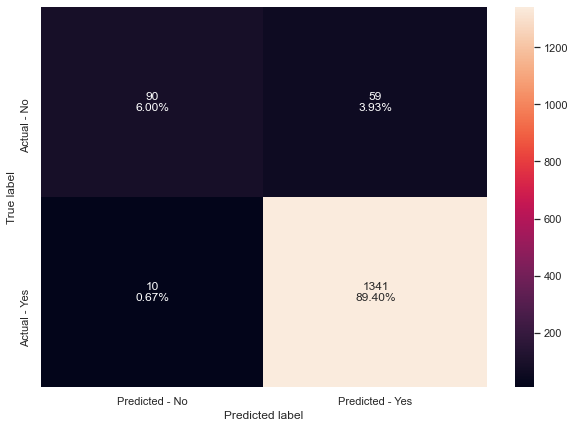

In [62]:
# creating confusion matrix
make_confusion_matrix_logistic(lg,X_test,y_test)

#### ROC-AUC

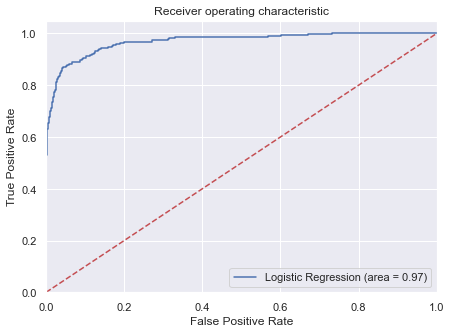

In [63]:
def display_ROC_AUC(model,X,Y):
    '''
    model : classifier to predict values of X
    X: actual train set
    Y : actual result set  
    
    '''
    logit_roc_auc_train = roc_auc_score(Y, model.predict_proba(X)[:,1])
    fpr, tpr, thresholds = roc_curve(Y, model.predict_proba(X)[:,1])
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

display_ROC_AUC(lg,X_train,y_train)

* ROC-AUC on test set

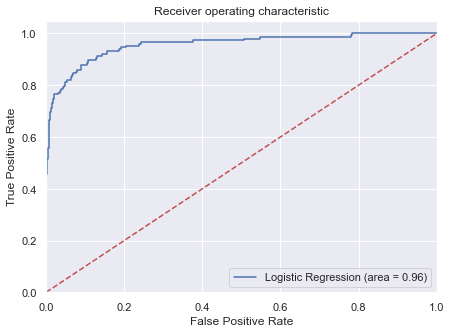

In [64]:
display_ROC_AUC(lg,X_test,y_test)

* Logistic Regression model is giving a good performance on training and test set.

### Finding the coefficients

In [65]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,Age,Income,Mortgage,CCAvg_log,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_True,CD_Account_True,Online_True,CreditCard_True
coef,0.01,0.06,0.00,1.12,-0.12,2.17,1.39,3.31,3.55,-0.74,2.96,-0.48,-0.77


### Coefficient interpretations

* Coefficient of age, Family with 2 members, Securitues_Account and CreditCard is negative, increase in these will lead to decrease in chances of person opting for personal loan.
* Coefficient Experience, income, CCAVG_log, Some of family types, Education and CD_Account,  positive increase in these will lead to chances of person opting for personal loan

###  Converting coefficients to odds

**Odds from coefficients**

In [66]:
odds = np.exp(lg.coef_[0]) # converting coefficients to odds
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

,Age,Income,Mortgage,CCAvg_log,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_True,CD_Account_True,Online_True,CreditCard_True
odds,1.01,1.06,1.00,3.07,0.88,8.76,4.02,27.46,34.72,0.48,19.21,0.62,0.46


**Percentage change in odds**

In [67]:
# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0])-1)*100 
# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T 

,Age,Income,Mortgage,CCAvg_log,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_True,CD_Account_True,Online_True,CreditCard_True
change_odds%,0.58,5.76,0.08,207.17,-11.52,775.74,301.74,2646.23,3371.63,-52.13,1821.29,-37.88,-53.93


### Coefficient interpretations

* `age`: Holding all other features constant a 1 unit change in Age will increase the odds of person opting for personal_Loan by 1.01 times/0.58%.
* `Income`: Holding all other features constant a 1 unit change in the Income will increase the odds of a customer opting for Personal_Loan by 1.06 times/5.76%.
* `Mortgage`: Holding all other features constant a 1 unit change in the Income will increase the odds of a customer opting for Personal_Loan by 1.0 times/0.08%.
* `CCAvg_log`: Holding all other features constant a 1 unit change in the CCAvg_log will increase the odds of a customer opting for Personal_Loan by 3.07 times/207.17%.
* `Family_2`: Holding all other features constant a 1 unit change in Age will decrease the odds of person opting for personal_Loan by 0.88 times/11.52%.
* `Family_3`/`Family_4`: Holding all other features constant a 1 unit change in the Family will increase the odds of a customer opting for Family by 8.76,4.02 times/775.74%,301.74% respectively.
* `Education_2`/`Educaton_3`: Holding all other features constant a 1 unit change in the Education will increase the odds of a customer opting for Family by 27.46,34.72 times/2646.23%, 3371.63% respectively.
* `Securities_Account_True `: Holding all other features constant a 1 unit change in Securities_Account will decrease the odds of person opting for personal_Loan by 0.48 times/52.13%.
* `CD_Account`: Holding all other features constant a 1 unit change in the CD_Account will increase the odds of a customer opting for Personal_Loan by 19.21 times/1821.29%.
* `Online`: Holding all other features constant a 1 unit change in Online will decrease the odds of person opting for personal_Loan by 0.62 times/37.88%.
* `CreditCard`: Holding all other features constant a 1 unit change in Creditcard will decrease the odds of person opting for personal_Loan by 0.46 times/53.93%.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [68]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.08061219954342627


In [69]:
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.8911428571428571
Accuracy on test set :  0.892
Recall on training set :  0.9123867069486404
Recall on test set :  0.8926174496644296
Precision on training set :  0.4617737003058104
Precision on test set :  0.4767025089605735
F1 on training set :  0.6131979695431472
F1 on test set :  0.6214953271028036
ROC-AUC Score on training set :  0.9006553288608776
ROC-AUC Score on test set :  0.8922746759795132


* The precision and F1 of the model has reduced on training and test set.
* Accuracy has decreased but recall has improved on training and test set.

#### Let's use Precision-Recall curve and see if we can find a better threshold

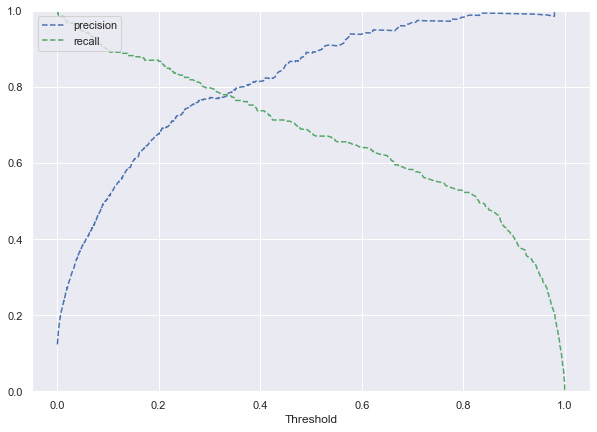

In [70]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.37, we get balanced recall and precision.

In [71]:
optimal_threshold_curve = 0.37

scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

Accuracy on training set :  0.9597142857142857
Accuracy on test set :  0.958
Recall on training set :  0.7613293051359517
Recall on test set :  0.697986577181208
Precision on training set :  0.802547770700637
Precision on test set :  0.8524590163934426
F1 on training set :  0.7813953488372092
F1 on test set :  0.7675276752767527
ROC-AUC Score on training set :  0.8708823868690171
ROC-AUC Score on test set :  0.8423315565402709


* Model is performing well on training and test set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.37 as the optimal threshold.

### Sequential Feature Selector

#### Selecting subset of important features using Sequential Feature Selector method

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [73]:
## Defining X and Y variables
X = dummy_logLoan.drop("Personal_Loan", axis=1)  # Features
Y = dummy_logLoan["Personal_Loan"].astype("int64")

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=1)

In [74]:
# Fit the model on train
model = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [75]:
X_train.shape

(3500, 13)

In [76]:
# Build model with all variables
sfs = SFS(model, k_features=13, forward=True, floating=False, scoring='roc_auc', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    2.9s finished

[2021-06-19 02:58:53] Features: 1/13 -- score: 0.925120323935044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.3s finished

[2021-06-19 02:58:54] Features: 2/13 -- score: 0.9351806460033808[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    1.1s finished

[2021-06-19 02:58:55] Features: 3/13 -- score: 0.9401881237550639[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished

[2021-06-19 02:58:56] Features: 4/13 -- score: 0.943

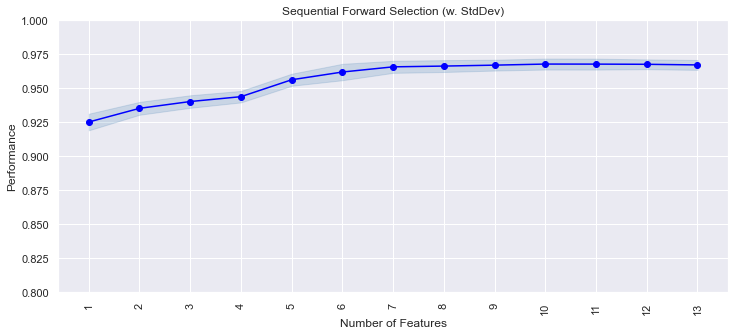

In [77]:
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev',figsize=(12,5))
plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xticks(rotation=90)
plt.show()

* We can see that performance increases till the 7th feature and slight increase after that. It is stable thereafter.
* So we'll use 9 features only to build our model but the choice of features it depends on the business context and use case of the model.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.4s finished

[2021-06-19 02:59:05] Features: 1/9 -- score: 0.925120323935044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.3s finished

[2021-06-19 02:59:07] Features: 2/9 -- score: 0.9351806460033808[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    1.2s finished

[2021-06-19 02:59:08] Features: 3/9 -- score: 0.9401881237550639[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished

[2021-06-19 02:59:09] Features: 4/9 -- score: 0.9437627

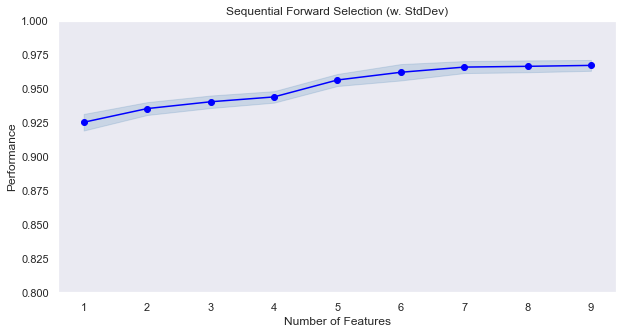

In [78]:
sfs1 = SFS(model, k_features=9, forward=True, floating=False, scoring='roc_auc', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev',figsize=(10,5))

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

**Finding which features are important?**

In [79]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 3, 5, 6, 7, 8, 10, 11, 12]


**Let's look at best 8 variables**

In [80]:
X_train.columns[feat_cols]

Index(['Income', 'CCAvg_log', 'Family_3', 'Family_4', 'Education_2',
       'Education_3', 'CD_Account_True', 'Online_True', 'CreditCard_True'],
      dtype='object')

In [81]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [82]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)
 
logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

### Let's Look at model performance

Accuracy on training set :  0.9625714285714285
Accuracy on test set :  0.9553333333333334
Recall on training set :  0.7009063444108762
Recall on test set :  0.6308724832214765
Precision on training set :  0.8787878787878788
Precision on test set :  0.8867924528301887
F1 on training set :  0.7798319327731094
F1 on test set :  0.7372549019607842


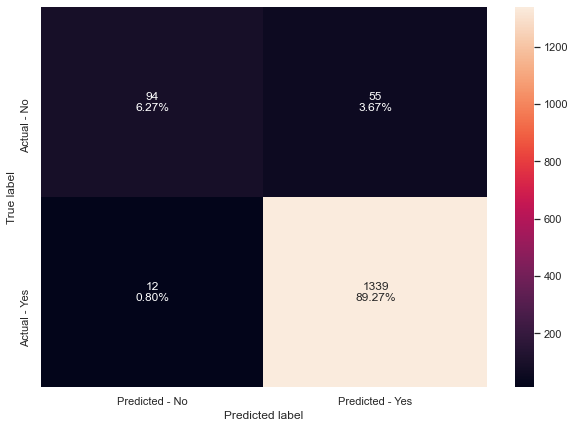

In [83]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix_logistic(logreg,X_test_final,y_test)

* Model is giving a generalized performance on training and test set.
* With a fewer number of features, the model performance is comparable to the initial logistic regression model.

### Model Performance Summary

In [84]:
# defining list of model
models = [lg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,flag=False)
    k = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    l = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    
    #intial model
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    #optimal threshold = 0.084  
    acc_train.append(k[0])
    acc_test.append(k[1])
    recall_train.append(k[2])
    recall_test.append(k[3])
    precision_train.append(k[4])
    precision_test.append(k[5])
    f1_train.append(k[6])
    f1_test.append(k[7])
    
    #optimal threshold = 0.37
    acc_train.append(l[0])
    acc_test.append(l[1])
    recall_train.append(l[2])
    recall_test.append(l[3])
    precision_train.append(l[4])
    precision_test.append(l[5])
    f1_train.append(l[6])
    f1_test.append(l[7])

In [85]:
# defining list of model
models = [logreg]

# looping through all the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [86]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression-0.080 Threshold',
                                          'Logistic Regression-0.37 Threshold)','Logistic Regression (SFS - 8 variable)'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1_Score':f1_train,'Test_F1_Score':f1_test}) 



comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_Score,Test_F1_Score
0,Logistic Regression,0.96,0.95,0.68,0.60,0.89,0.90,0.77,0.72
1,Logistic Regression-0.080 Threshold,0.89,0.89,0.91,0.89,0.46,0.48,0.61,0.62
2,Logistic Regression-0.37 Threshold),0.96,0.96,0.76,0.70,0.80,0.85,0.78,0.77
3,Logistic Regression (SFS - 8 variable),0.96,0.96,0.70,0.63,0.88,0.89,0.78,0.74


### Conclusion

* We have been able to build a predictive model that can be used by bank to target customer with an precision of 0.89 on the training set with Initial logistic regression model.
* We found that Income, CCAvg_log, Some Family Types('Family_3', 'Family_4'), Higher Education(Education_2, Education_3),CD_Account,Online and CreditCard  are important features.
* Coefficient of age, family type of 2,Securities_Account, Online and CreditCard is negative, increase in these will lead to decrease in chances of approached customer not being interested in Personal_loan. 
* Coefficient Experience, Income, CCAvg, some Family type, Education and CD_Account is positive increase in these will lead to increase in chances approached customer's conversion to asset.

## Build Decision Tree Model

* Building DecisionTreeClassifier with default 'gini' criteria to split. 
* Since all data preparation was completed previously. We'll directly use dummy_logLoan dataframe for decision tree modelling.

In [87]:
dummy_logLoan.columns

Index(['Age', 'Income', 'Mortgage', 'Personal_Loan', 'CCAvg_log', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3',
       'Securities_Account_True', 'CD_Account_True', 'Online_True',
       'CreditCard_True'],
      dtype='object')

In [88]:
dummy_logLoan.shape

(5000, 14)

* All required columns are present and dimension of data is as expected.

### Splitting Data

In [89]:
X = dummy_logLoan.drop("Personal_Loan", axis=1)  # Features
y = dummy_logLoan["Personal_Loan"].astype("int64") #   # Labels (Target Variable)
feature_names = X.columns

In [90]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 13) (1500, 13)


* Dimension of dependent variable Personal_Loan is correct.
* Now, We'll create a copy of dataframe to avoid manipulating original dataframe

In [91]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [92]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [93]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [94]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

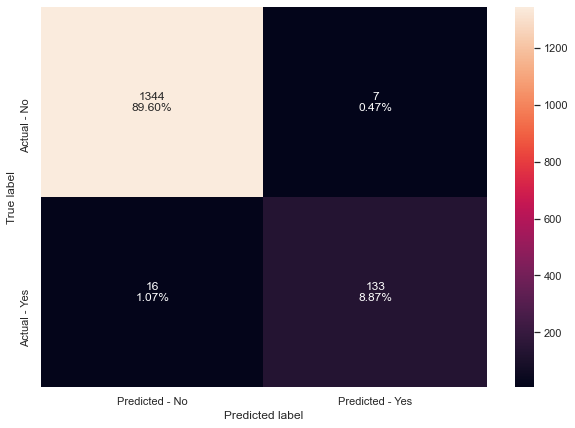

In [95]:
make_confusion_matrix(model, y_test)

In [96]:
y_train.value_counts(1)

0   0.91
1   0.09
Name: Personal_Loan, dtype: float64

* We only have 9% of positive classes, so if our model marks each sample as negative, then also we'll get 91% accuracy, hence accuracy is not a good metric to evaluate here.

### Insights:

- **True Positives:**
    - Reality: A customer is an asset.
    - Model predicted: Customer is a contributing to banks revenue.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer is NOT an asset.
    - Model predicted: Customer is a NOT contributing to bank's revenue.
    - Outcome: Bank's revenue is unaffected.

- **False Positives:**
    - Reality: A customer is NOT an asset.
    - Model predicted: Customer will contribute to bank's revenue.
    - Outcome: Bank will targeting the potential customers will be wasting their resources on the customers who will not be contributing to the banks revenue.

- **False Negatives:**
    - Reality: A customer is an asset.
    - Model predicted: Customer will NOT contribute to revenue.
    - Outcome: The potential customer is missed by the sales/marketing team. Since, team never tried to approach them.

* In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.

In [97]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

In [98]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8926174496644296


* Model seems to be overfitting because there is difference between training and test score

## Visualizing the Decision Tree

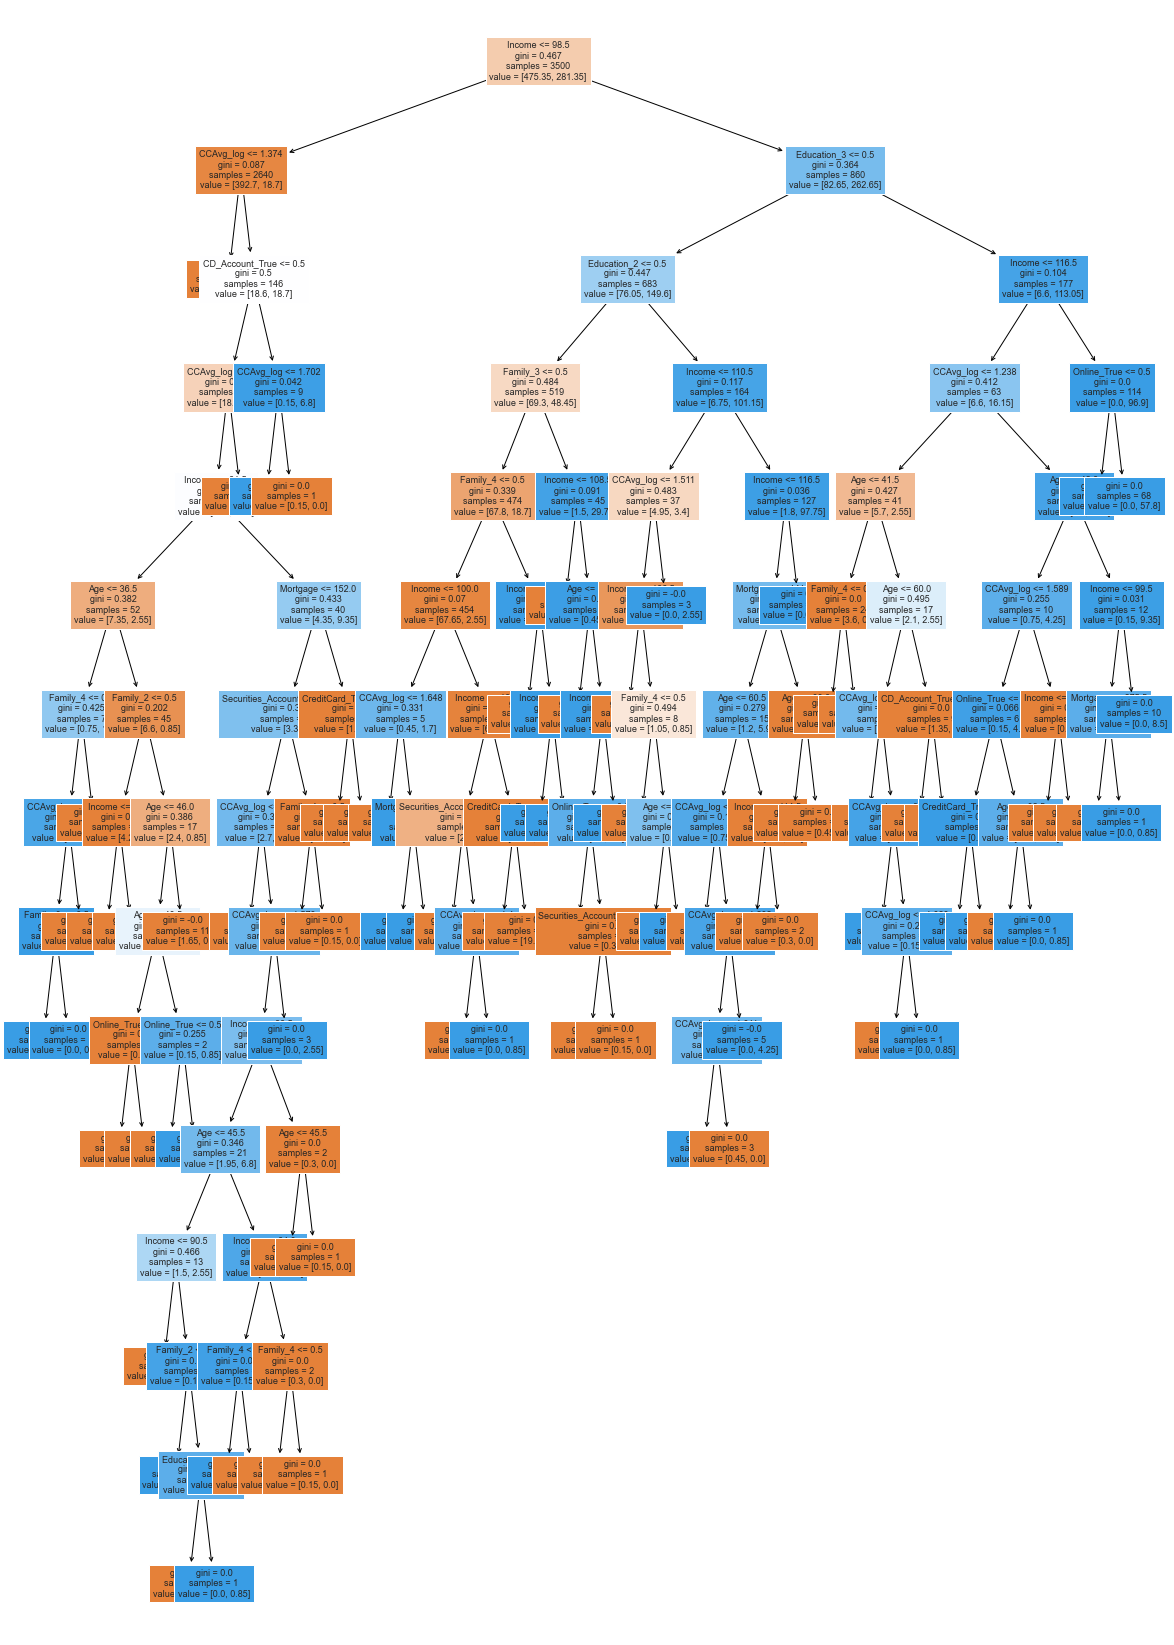

In [99]:
def view_decision_tree(target_model):
    '''
    Plot decision tree of given target model 
    '''
    plt.figure(figsize=(20, 30))
    out = tree.plot_tree(
        target_model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

view_decision_tree(model)

* Tree structure is slightly complex to interpret

In [100]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names.tolist(), show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- CD_Account_True <= 0.50
|   |   |   |--- CCAvg_log <= 1.60
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- CCAvg_log <= 1.50
|   |   |   |   |   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg_log >  1.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- Family_2 <= 0.50
|   |   |   |   |   |   |   |--- Income <= 56.50
|   |   |   |   |   |

In [101]:
def display_imp_features(target_model):
    '''
    Display importance score of target model of decision tree
    '''
    print(
        pd.DataFrame(
            target_model.feature_importances_, columns=["Imp"], index=X_train.columns
        ).sort_values(by="Imp", ascending=False)
    )
display_imp_features(model)

                         Imp
Income                  0.60
CCAvg_log               0.09
Education_2             0.09
Family_4                0.07
Family_3                0.07
Education_3             0.04
Age                     0.02
CD_Account_True         0.01
Mortgage                0.01
Securities_Account_True 0.00
Online_True             0.00
Family_2                0.00
CreditCard_True         0.00


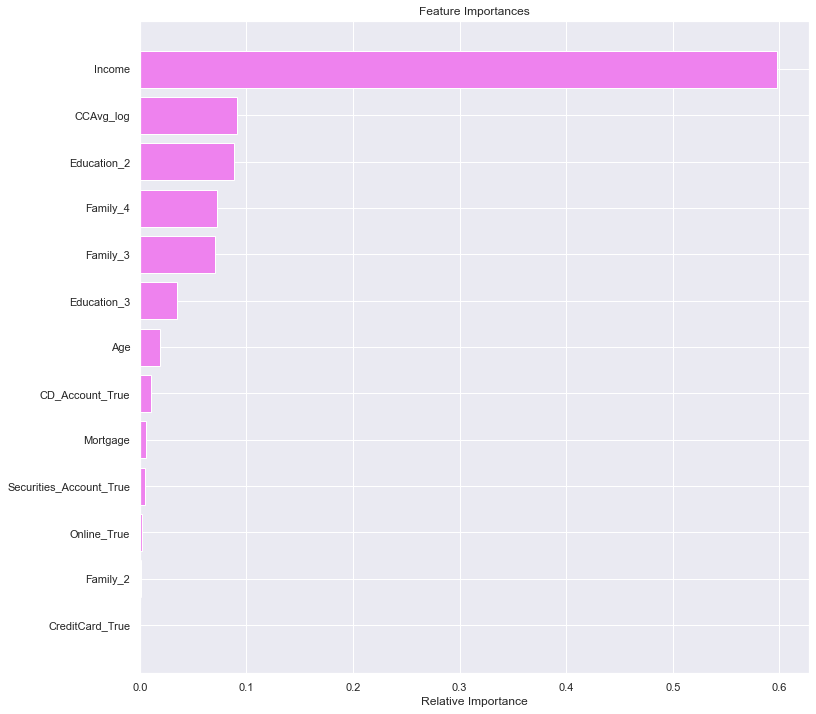

In [102]:
def plot_imp_features(target_model):
    '''
    Plot horizontal bar for target model of decision tree
    '''
    importances = target_model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()
plot_imp_features(model)

* Income is the most important variable for predicting the asset customers.
* Them importance of remaining feature decreasing gradually 

## Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=6,
                       max_features='log2', min_impurity_decrease=1e-06,
                       random_state=1)

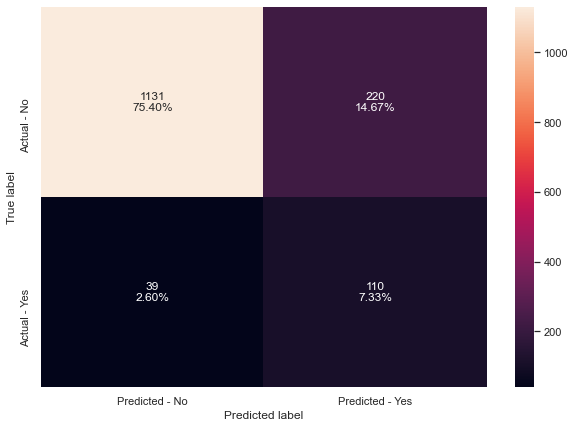

In [105]:
make_confusion_matrix(estimator, y_test)

In [106]:
get_recall_score(estimator)

Recall on training set :  0.8187311178247734
Recall on test set :  0.738255033557047


**Recall has improved for both train and test set after hyperparameter tuning and we have a generalized model.**

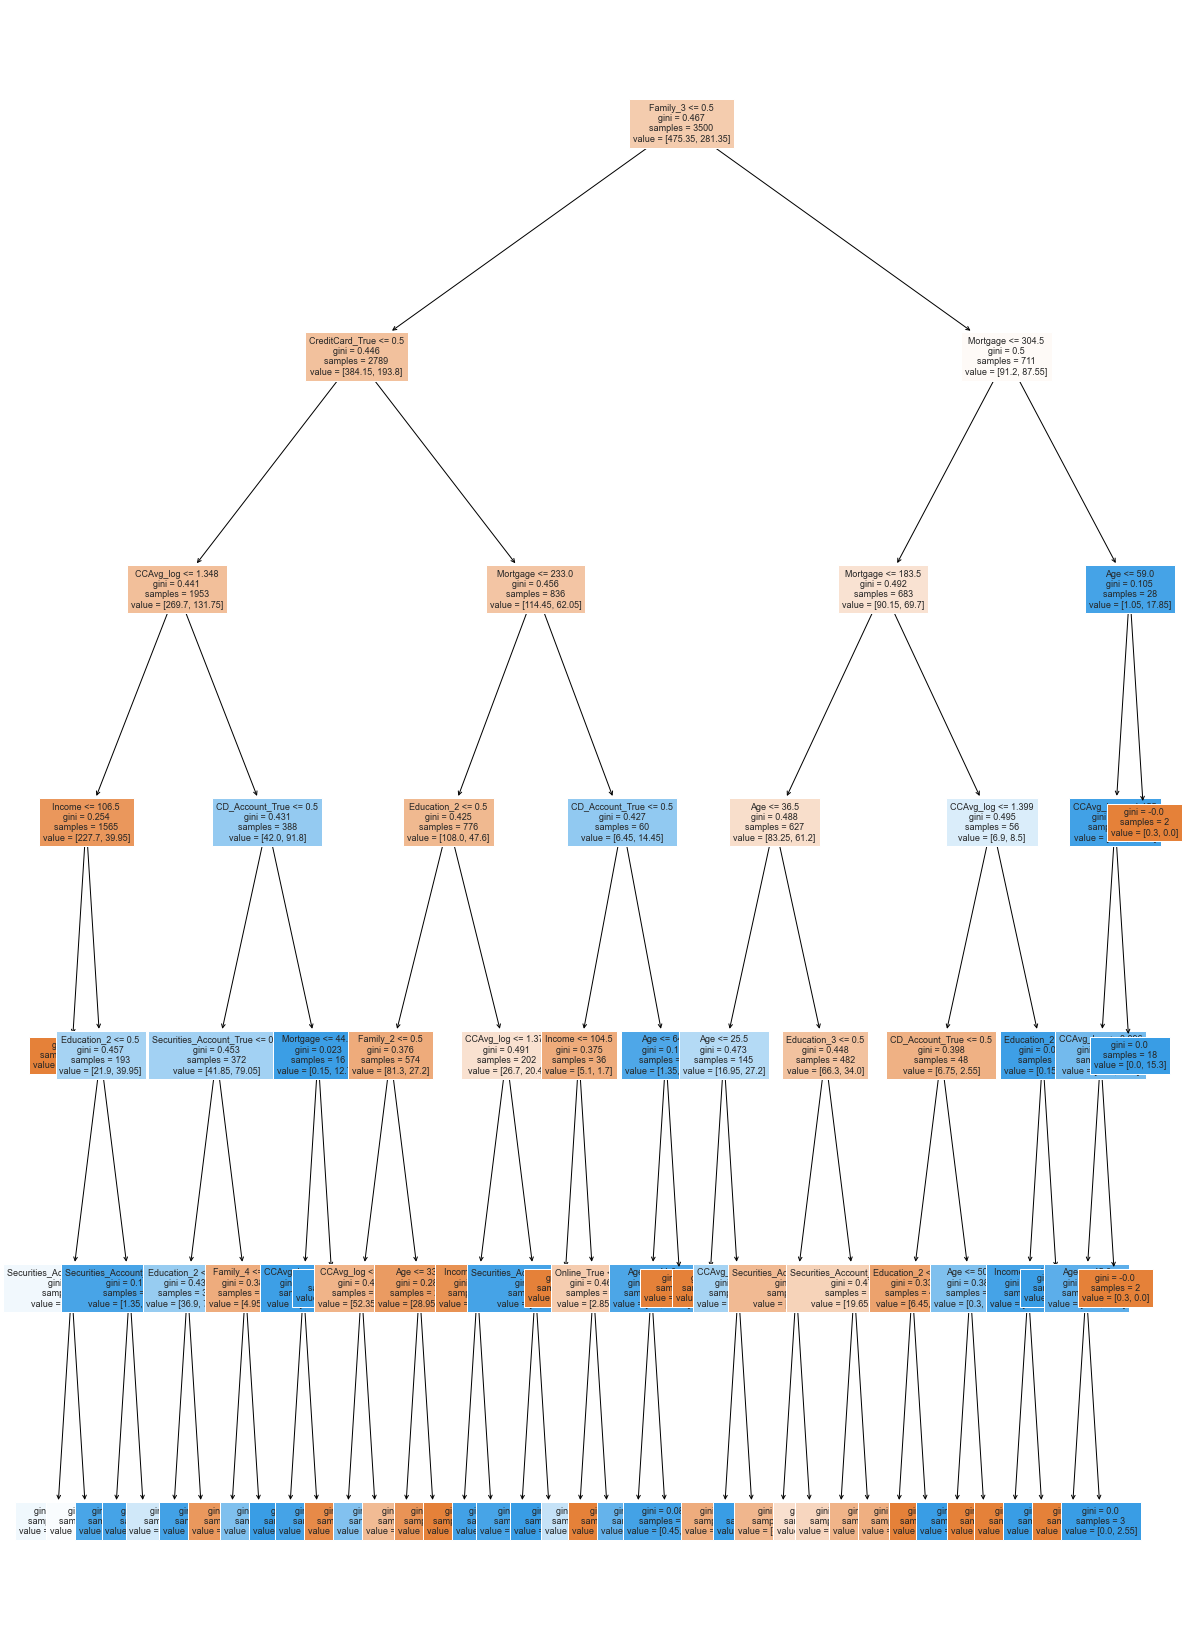

In [107]:
view_decision_tree(estimator)

In [108]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names.tolist(), show_weights=True))

|--- Family_3 <= 0.50
|   |--- CreditCard_True <= 0.50
|   |   |--- CCAvg_log <= 1.35
|   |   |   |--- Income <= 106.50
|   |   |   |   |--- weights: [205.80, 0.00] class: 0
|   |   |   |--- Income >  106.50
|   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |--- Securities_Account_True <= 0.50
|   |   |   |   |   |   |--- weights: [18.90, 20.40] class: 1
|   |   |   |   |   |--- Securities_Account_True >  0.50
|   |   |   |   |   |   |--- weights: [1.65, 1.70] class: 1
|   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |--- Securities_Account_True <= 0.50
|   |   |   |   |   |   |--- weights: [1.20, 15.30] class: 1
|   |   |   |   |   |--- Securities_Account_True >  0.50
|   |   |   |   |   |   |--- weights: [0.15, 2.55] class: 1
|   |   |--- CCAvg_log >  1.35
|   |   |   |--- CD_Account_True <= 0.50
|   |   |   |   |--- Securities_Account_True <= 0.50
|   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |--- weights: [35.55, 46.75] class: 1
|   |  

In [109]:
display_imp_features(estimator)

                         Imp
CCAvg_log               0.49
Income                  0.23
Mortgage                0.07
Education_2             0.07
Age                     0.04
CD_Account_True         0.04
Family_3                0.03
Securities_Account_True 0.01
Online_True             0.00
Family_2                0.00
Family_4                0.00
Education_3             0.00
CreditCard_True         0.00


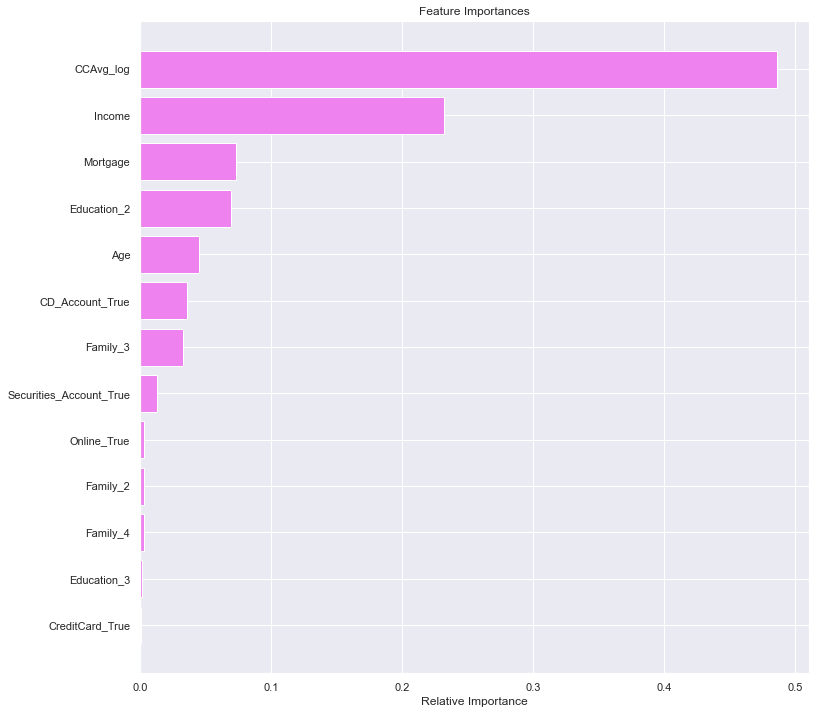

In [110]:
plot_imp_features(estimator)

## Cost Complexity Pruning

In [111]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [112]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00,-0.00
1,0.00,-0.00
2,0.00,-0.00
3,0.00,-0.00
4,0.00,-0.00
5,0.00,-0.00
6,0.00,-0.00
7,0.00,-0.00
8,0.00,-0.00
9,0.00,-0.00


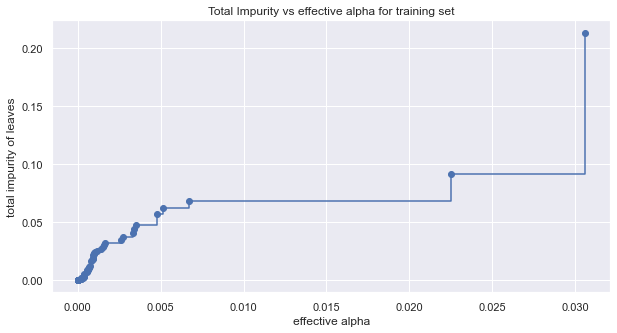

In [113]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Decison tree is trained using alphas value as the scpre as impority of leaves increase alpha value increases too. At the end we left with root node ie. only one node.
* Therefore, we'll  remove the last element in``clfs`` and ``ccp_alphas``, because it is not a effective decision tree mdoel with only onenode.

In [114]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489480923


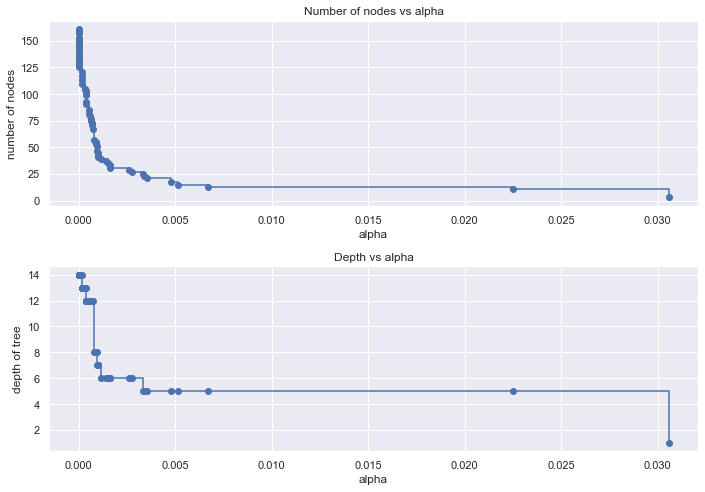

In [115]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [116]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [117]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

In [118]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

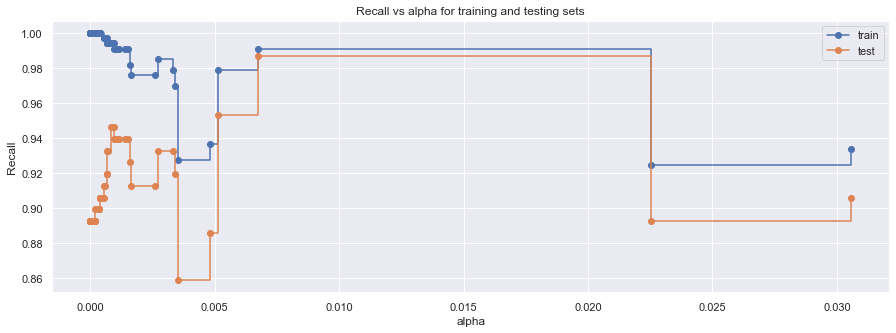

In [119]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.007 alpha which will be best score to retain information and getting higher recall.**

In [120]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006725813690406916,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [121]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006725813690406916,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

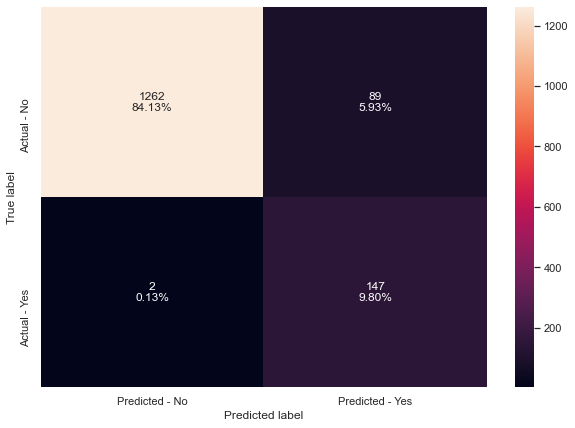

In [122]:
make_confusion_matrix(best_model, y_test)

In [123]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


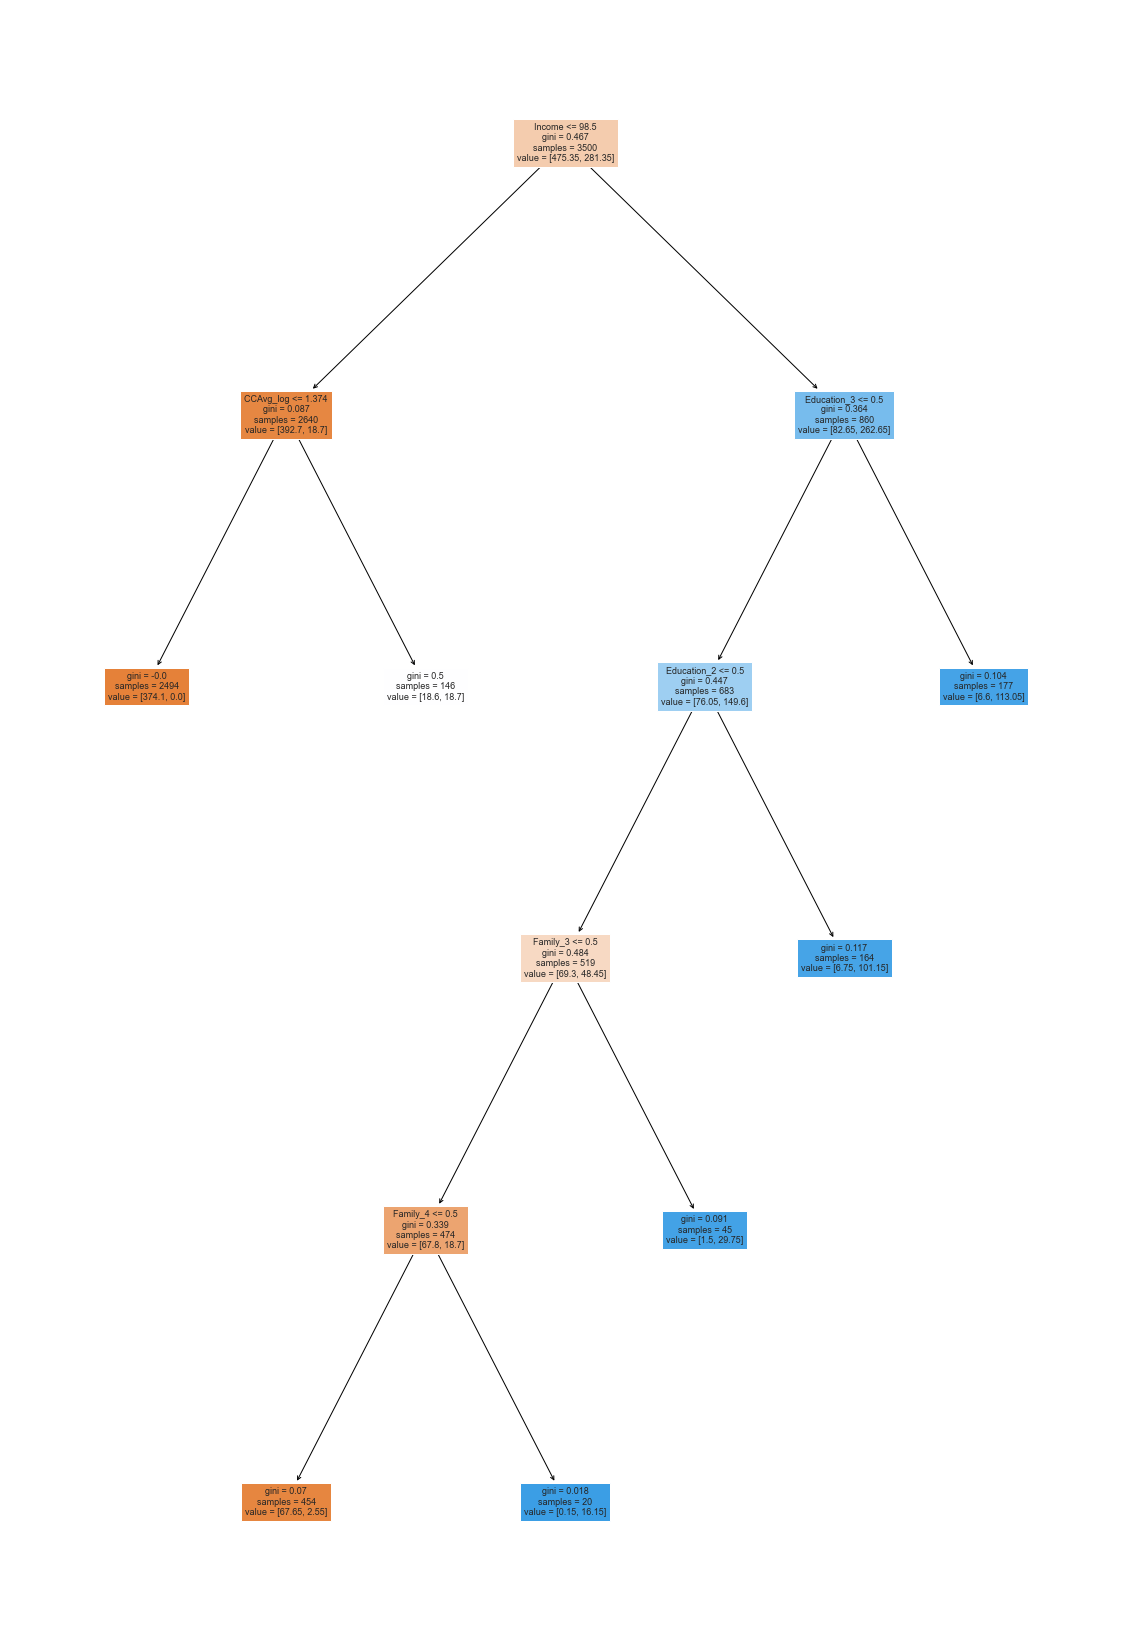

In [124]:
view_decision_tree(best_model)

In [125]:
### Inspecting for beste model with ccp_alpha=0.007

In [126]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.007, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.007, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

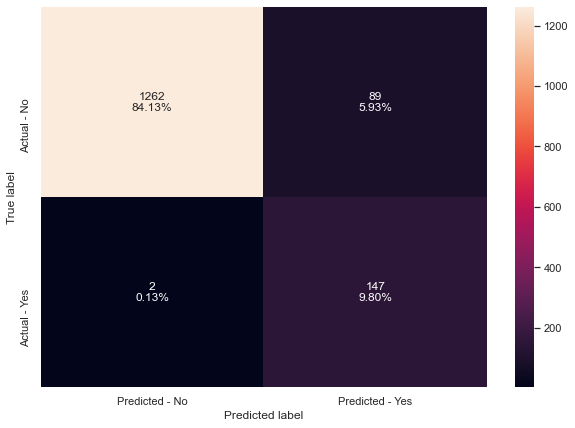

In [127]:
make_confusion_matrix(best_model2, y_test)

In [128]:
get_recall_score(best_model2)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


* Since both score are matching , we do't require to for further analysis. we already have best model

In [129]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names.tolist(), show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



In [130]:
display_imp_features(best_model2)

                         Imp
Income                  0.64
Education_2             0.10
Family_3                0.08
Family_4                0.08
CCAvg_log               0.06
Education_3             0.04
Age                     0.00
Mortgage                0.00
Family_2                0.00
Securities_Account_True 0.00
CD_Account_True         0.00
Online_True             0.00
CreditCard_True         0.00


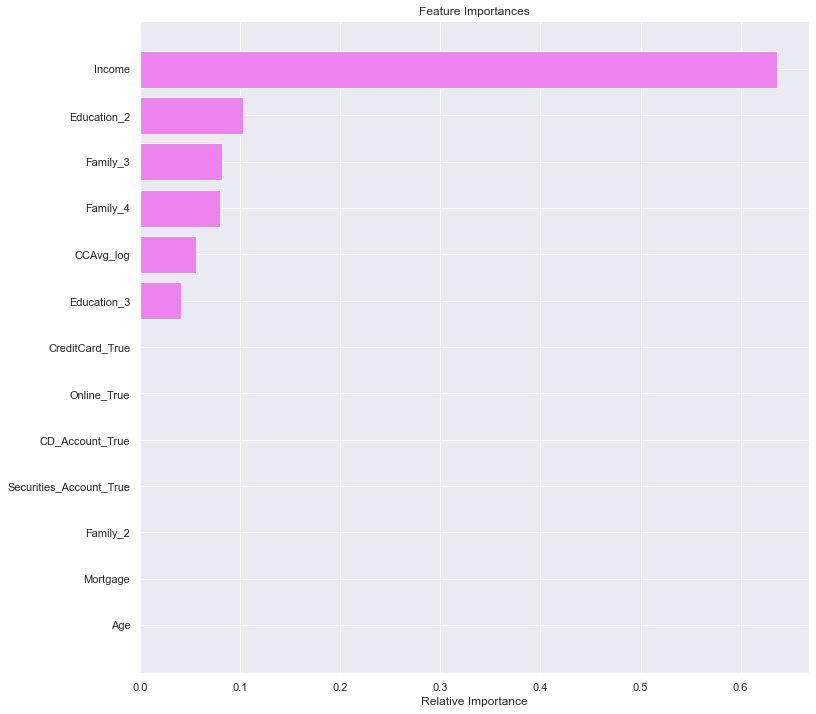

In [131]:
plot_imp_features(best_model2)

In [132]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Initial decision tree model",
            "Decision tree with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Recall": [1, 0.8187, 0.9909],
        "Test_Recall": [0.8926, 0.7382, 0.9865],
    }
)
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.89
1,Decision tree with hyperparameter tuning,0.82,0.74
2,Decision tree with post-pruning,0.99,0.99


**Decision tree model with post pruning has given the best recall score on data.**

### Conclusions

* We analyzed and build predictive model using Decision Tree Classifier with differnt technique like hyper paramer tunning and post prunning
* The model built will help bank to approach customer with potential conversion to asset customer.
* Decision tree visualization and confusion matrix allowed easy grasp and interpretation of result.
* We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
* Income, Education(Graduate), some of the family with 3 and 4 heads, CCAvg_log, Education(Advanced/Professional)  are the most important variable in predicting the banks to approach the customer with potential conversion to asset customer.
* We were able to analyze the contribution of hyper-parameters/ pruning to reduce overfitting and optimize for better model.

### Recommendations

* According to the decision tree model - 
     * Customer with highest income has greatest potential asset conversion.
     * They can be approched with promotinal offer with discout to encourage customer retentation
     * Some of the Family types(3 heads and 4 heads) are can be approached for personal loan. Because they might have short term finacial needs
     * Graduate and Advance degree holder are belongs to hight income group therefore, they can be approached with 
      right scheme
     * Credit card user group can be targeted  for conversion to asset incase they'll like to avail personal_aload to meet bill payment or looking for big amount beyong their credit card limit.

### Comparison Logistic regression  and Decision tree

Based on the analysis of both the model, below is the important takeways
* Logistic regression 
  * Model building require complete involvement from begining to untill result stage to make sure each and every features are well analysed
    before including /excluding.
  * Number of features are more than decision tree model.
  * More number of feature can be advantageous if dataset size grows.
  * Its very difficult to decides how many features to keep for final model even we have scores from SFS.
  * Although, SFS score increments slightly when model are about to be stable. Since it scores increments cumulitatively. It helps in selection/discarding of feature with approax estimates.
  
* Decision Tree
  * Model building and getting to the results is lot faster. 
  * Numbers of feature to consider is far less than logistic regression 
  * Each features are provided in their sequence of importance score
  * It provides clear visual representaion as each of the features are getting added. which can help great help in 
    decision making for marketing team
  * Since it drops the unimportant features, when sample size grow bigger other important features can become 
    important contributor
  * For Cost Complexity Pruning, careful selection of alpha score is important to get optimized score. otherwise in complex model(very large dataset) we might end slecting alhpa which will give overfit or underfit model.

 
**I'll suggest Decision tree model to marketing team, since it lists out the model based on importance of ranking. 
Since its quicker to implement in future if new features are introduced or data set size grows model can be quickly
retrained to fit into new situation**

### Perform an Exploratory Data Analysis on the incorrectly predicted data

In [133]:
def eda_incorrect_data(target_model):
    ''' 
    Plotting the incorrectly predicted data for target model 
    '''
    dt_pred_result = pd.DataFrame(
        {

            "y_predict": target_model.predict(X_test),
            "y_test": y_test,
        }
    )
    sns.countplot(x="y_test", hue="y_predict", data=dt_pred_result);

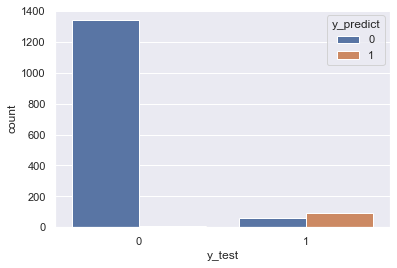

In [134]:
eda_incorrect_data(lg)

* In initial logistic regressioin model, 
    * Original and predicted liability customer are same
    * Almost half of the asset customers are predicted as liability

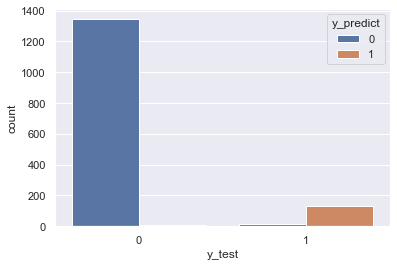

In [135]:
eda_incorrect_data(model)

* In initial decision tree model, 
    * Original and predicted liability customer were same
    * Very small number of asset customes are predicted as liability

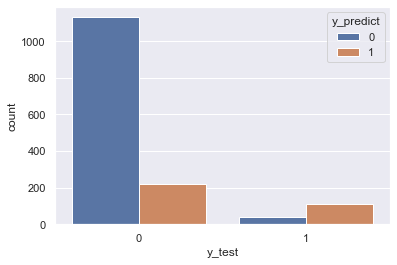

In [136]:
eda_incorrect_data(estimator)

* In Decision tree with hyperparameter tuning model, 
    * Big percentage of liability customers are predicted as asset
    * Similarly, big percentage of asset customers are predicted as liability 

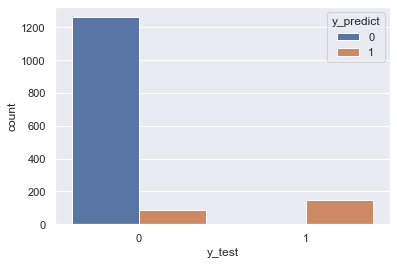

In [137]:
eda_incorrect_data(best_model)

* In Decision tree with post-pruning, 
    * Small percentage of liability customers are predicted as asset
    * All asset customers are correctly predicted as asset.

### Recommendations

* Customer with CD_Account category has largest proportion of Personal_Loan category. we can introduce discounted rate of loan for them against their account.
* Similarly, we can approach customer with Securities_Account with discounted rate when they need urgent fund for trading because of opportunities in trade and security market.
* Approaching family high head count , which they need for short term requirements like buying appliances or put some money for mortgage.
* Customer with Higher Income group can be approached, chances of them paying back returning for next loan is more than lower income groups. We can introduce loyalty discount scheme for returning customer. 
* Making Online process hassle free with short number of steps. Many customers are discourage when they many steps
  for availing the loan.
* Online users, who has CD_Account and Securities_account can be presented with loan scheme occasionally on login so that they are aware of this information and they can avail personal loan need.
* Targeting Credit card users, who may be needing lump sum money to meet their financial need and their credit card 
  limit doesn't allow them.
* Targeting non-online users through mail or media advertising (TV and Radio). Since we saw that people in all age group equally likely to opt for loan. Non-online users and elder age group we are completely missing out.  
* Mortgage customer can be targeted during closing of financial year to meet the deadline for their loan payment.
* Single and double head family has high disposable income, high spender and many have Mortgages. Bank can try to convert them by offering scheme like on opening CD_Account and they can get Personal_Loan discount.